# P3 - Open Food Facts - Exploration

## Import

In [31]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, normaltest, anderson

plt.style.use('seaborn')

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\35862722.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [32]:
data = pd.read_csv('../Source/openfoodfacts_clean.csv', sep='\t', low_memory=False)

In [33]:
data.describe(include='all')

product_name brands nutrition_grade_fr pnns_groups_1  energy_100g  \
count               8165   8146               8165          8165  8165.000000   
unique              7035   2648                  5            10          NaN   
top     Lait demi-écrémé      U                  B  a renseigner          NaN   
freq                  25    242               4212          2963          NaN   
mean                 NaN    NaN                NaN           NaN    54.116724   
std                  NaN    NaN                NaN           NaN    28.652921   
min                  NaN    NaN                NaN           NaN     0.000000   
25%                  NaN    NaN                NaN           NaN    33.460803   
50%                  NaN    NaN                NaN           NaN    50.908222   
75%                  NaN    NaN                NaN           NaN    80.066922   
max                  NaN    NaN                NaN           NaN    99.904398   

           fat_100g  saturated_fat_100g  carbohydrates_100g  sugars_100g  \
count   8165.000000         8165.000000         8165.000000  8165.000000   
unique          NaN                 NaN                 NaN          NaN   
top             NaN                 NaN                 NaN          NaN   
freq            NaN                 NaN                 NaN          NaN   
mean       1.430078            0.738145            7.538405     6.209020   
std        1.645300            1.596104            4.811516     5.799296   
min        0.000000            0.000000            0.000000     0.000000   
25%        0.032000            0.000000            4.264000     1.500000   
50%        0.830000            0.200000            6.900000     4.800000   
75%        2.500000            1.000000           11.260000    10.400000   
max       10.600000           55.000000           23.700000   100.000000   

         fiber_100g  proteins_100g  nutrition_score_fr_100g         temp  \
count   8165.000000    8165.000000              8165.000000  8165.000000   
unique          NaN            NaN                      NaN          NaN   
top             NaN            NaN                      NaN          NaN   
freq            NaN            NaN                      NaN          NaN   
mean       0.547137       2.297982                 4.273484    38.701460   
std        0.894678       3.658017                 4.902657    32.519036   
min        0.000000       0.000000                 0.000000     0.000000   
25%        0.000000       0.200000                 1.000000     6.320000   
50%        0.120000       1.000000                 2.000000    35.200000   
75%        0.900000       3.200000                 6.000000    66.600000   
max       33.000000      26.000000                30.000000   105.600000   

           sel_100g  
count   8165.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       1.261293  
std        7.577286  
min        0.000000  
25%        0.010000  
50%        0.120000  
75%        0.760000  
max      100.000000

In [34]:
data.columns.tolist()

['product_name',
 'brands',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'energy_100g',
 'fat_100g',
 'saturated_fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'nutrition_score_fr_100g',
 'temp',
 'sel_100g']

In [35]:
data.dtypes

product_name                object
brands                      object
nutrition_grade_fr          object
pnns_groups_1               object
energy_100g                float64
fat_100g                   float64
saturated_fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
nutrition_score_fr_100g    float64
temp                       float64
sel_100g                   float64
dtype: object

# Analyse Univaries

## Variables Quantitatives Continues

In [36]:
def trace_histplot_gen_zoom(
        dataframe,
        variable,
        titre,
        xlabel,
        xlim_bas,
        xlim_haut,
        ylim_bas,
        ylim_haut,
        kde=True,
        mean_median_mode=True,
        mean_median_zoom=False):
    """
    Histplot pour les variables quantitatives général + histplot
    ----------
    @param IN : dataframe : DataFrame, obligatoire
                variable : colonne dont on veut voir les histplot
                titre : titre du graphique (str)
                xlabel:légende des abscisses
                xlim_bas : limite du zoom supérieur bas(int)
                xlim_haut : limite du zoom supérieur haut(int)
                ylim_bas : limite du zoom inférieur bas(int)
                ylim_haut : limite du zoom inférieur haut(int)
                kde : boolean pour tracer la distribution normale
                mean_median_mode : boolean pour tracer la moyenne, médiane et mode
                mean_median_zoom : boolean pour tracer la moyenne et médiane sur le graphique zoomé
    @param OUT :None
    """
    # Distplot général + zoom
    fig = plt.figure(figsize=(15, 6))

    data = dataframe[variable]
    ax1 = fig.add_subplot(1, 2, 1)
    ax1 = sns.histplot(data, kde=kde, color='SteelBlue')
    if mean_median_mode:
        ax1.vlines(data.mean(), *ax1.get_ylim(), color='red', ls='-', lw=1.5)
        ax1.vlines(
            data.median(),
            *ax1.get_ylim(),
            color='green',
            ls='-.',
            lw=1.5)
        ax1.vlines(
            data.mode()[0],
            *ax1.get_ylim(),
            color='goldenrod',
            ls='--',
            lw=1.5)
    ax1.legend(['mean', 'median', 'mode'])
    ax1.set_xlabel(xlabel, fontsize=12)
    ax1.set_ylabel('Nombre', fontsize=12)
    ax1.set_title(titre, fontsize=14)
    plt.grid(False)

    ax2 = fig.add_subplot(1, 2, 2)
    ax2 = sns.histplot(dataframe[variable], kde=kde, color='SteelBlue')
    if mean_median_zoom:
        ax2.vlines(data.mean(), *ax2.get_ylim(), color='red', ls='-', lw=1.5)
        ax2.vlines(
            data.median(),
            *ax2.get_ylim(),
            color='green',
            ls='-.',
            lw=1.5)
    ax2.set_xlabel(xlabel, fontsize=12)
    ax2.set_ylabel('Nombre', fontsize=12)
    ax2.set_xlim(xlim_bas, xlim_haut)
    ax2.set_ylim(ylim_bas, ylim_haut)
    ax2.set_title(titre + ' Zoom', fontsize=14)
    plt.grid(False)

    plt.show()

In [37]:
def trace_dispersion_boxplot_qqplot(dataframe, variable, titre, unite):
    """
    Suivi des dipsersions : bosplot et qqplot
    ----------
    @param IN : dataframe : DataFrame, obligatoire
                variable : colonne dont on veut voir les outliers
                titre :titre pour les graphiques (str)
                unite : unité pour ylabel boxplot (str)
    @param OUT :None
    """
    # Boxplot + qqplot
    fig = plt.figure(figsize=(15, 6))

    data = dataframe[variable]

    ax1 = fig.add_subplot(1, 2, 1)
    box = sns.boxplot(data=data, color='SteelBlue', ax=ax1)
    box.set(ylabel=unite)

    plt.grid(False)

    ax2 = fig.add_subplot(1, 2, 2)
    ax2 = qqplot(data,
                 line='r',
                 **{'markersize': 5,
                    'markeredgecolor': 'k',
                    'color': 'SteelBlue'},
                 ax=ax2)
    plt.grid(False)

    fig.suptitle(titre, fontweight='bold', size=14)
    plt.show()

## Nutriments

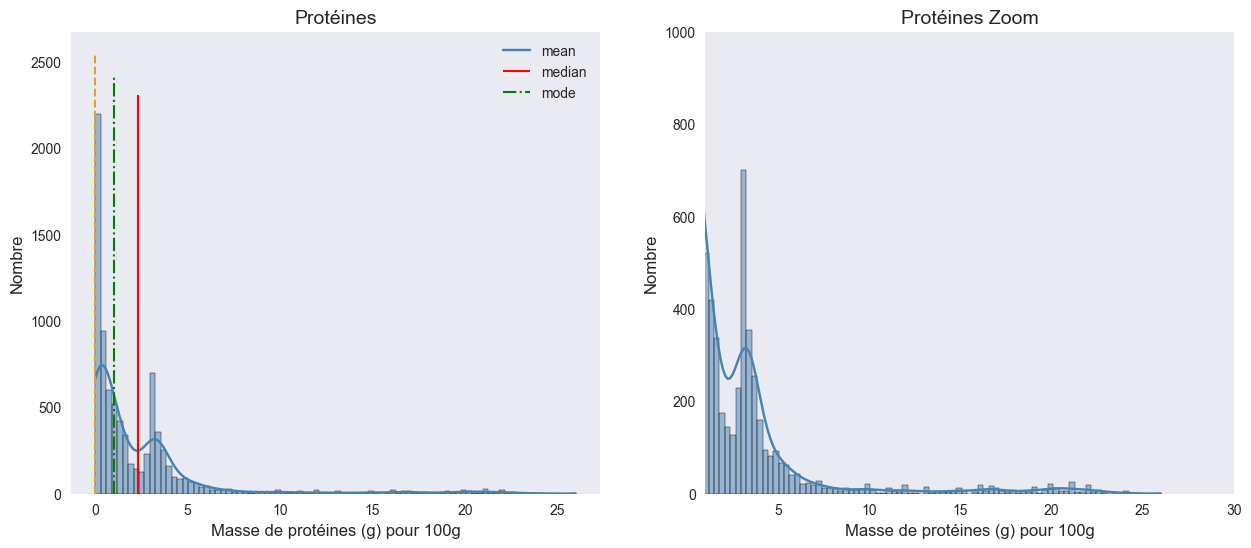

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


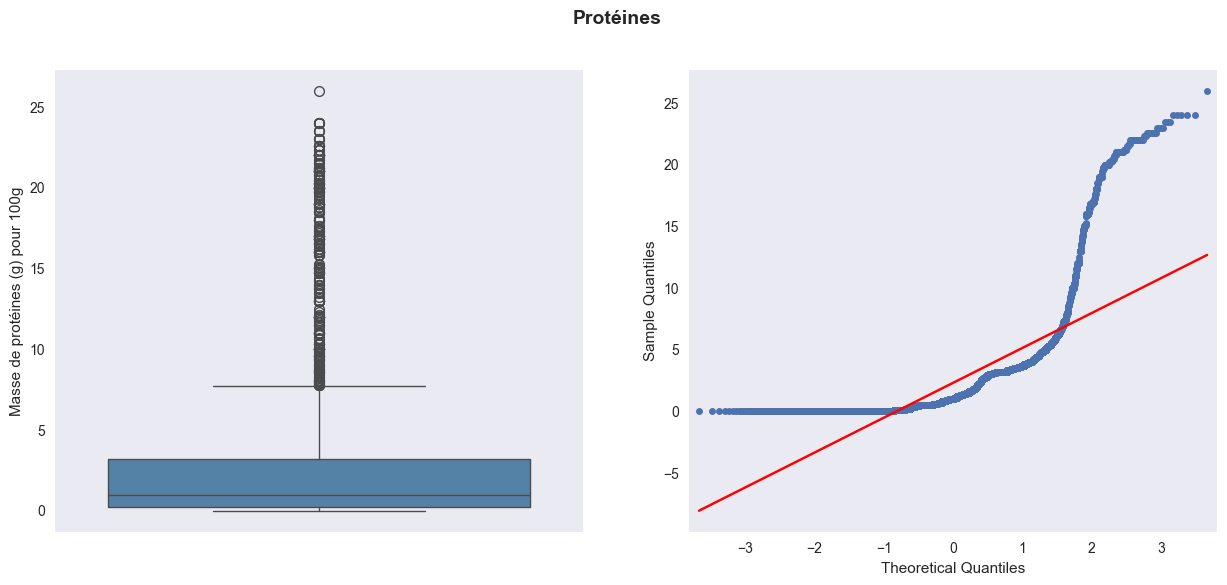

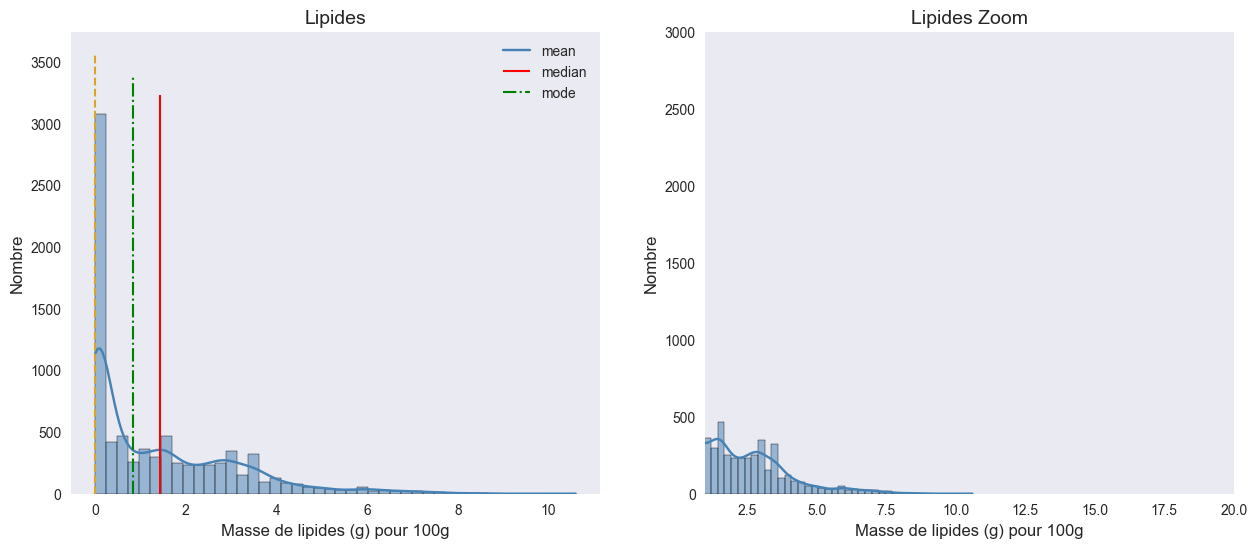

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


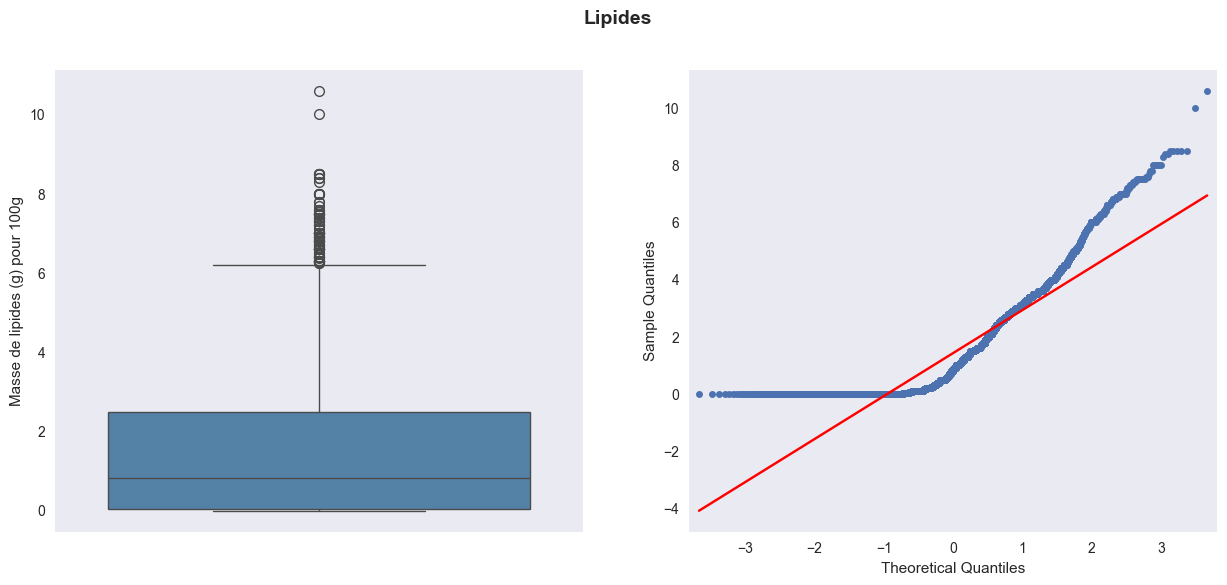

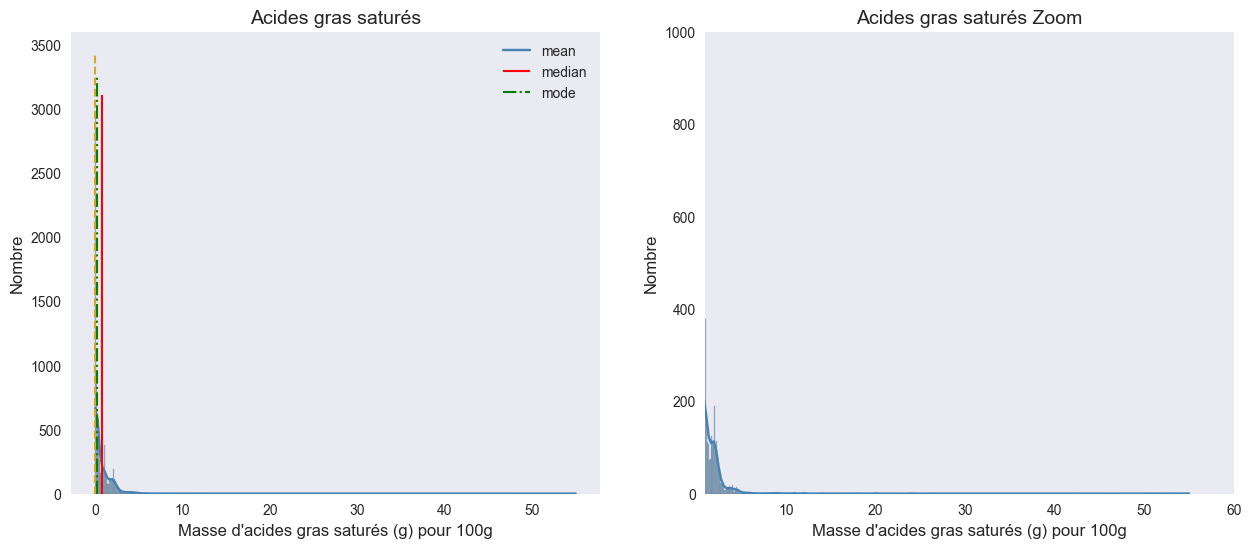

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


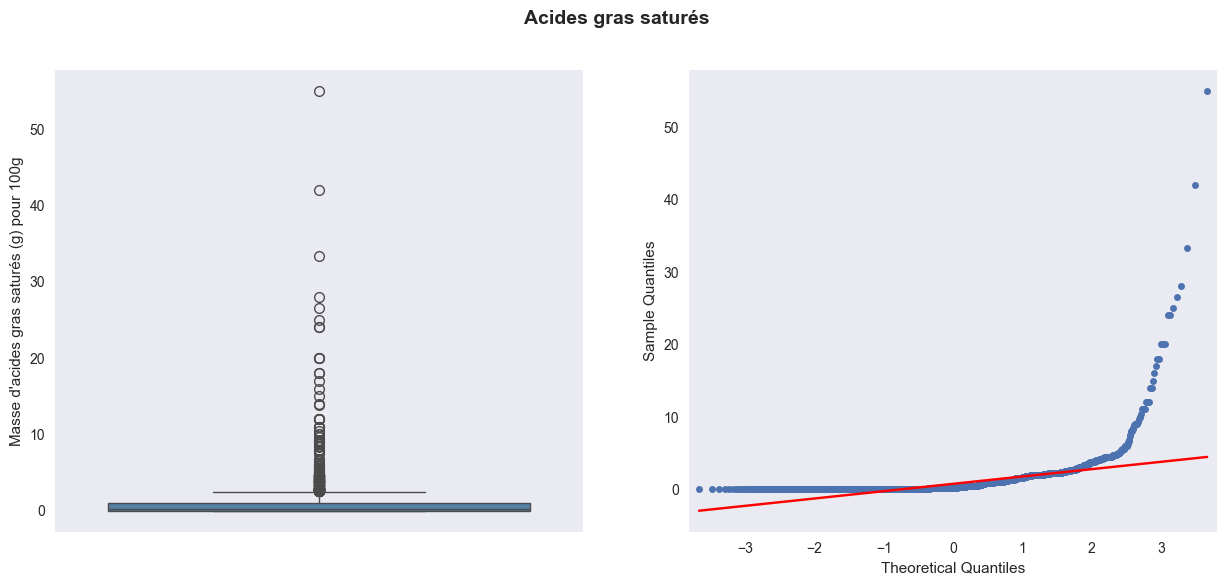

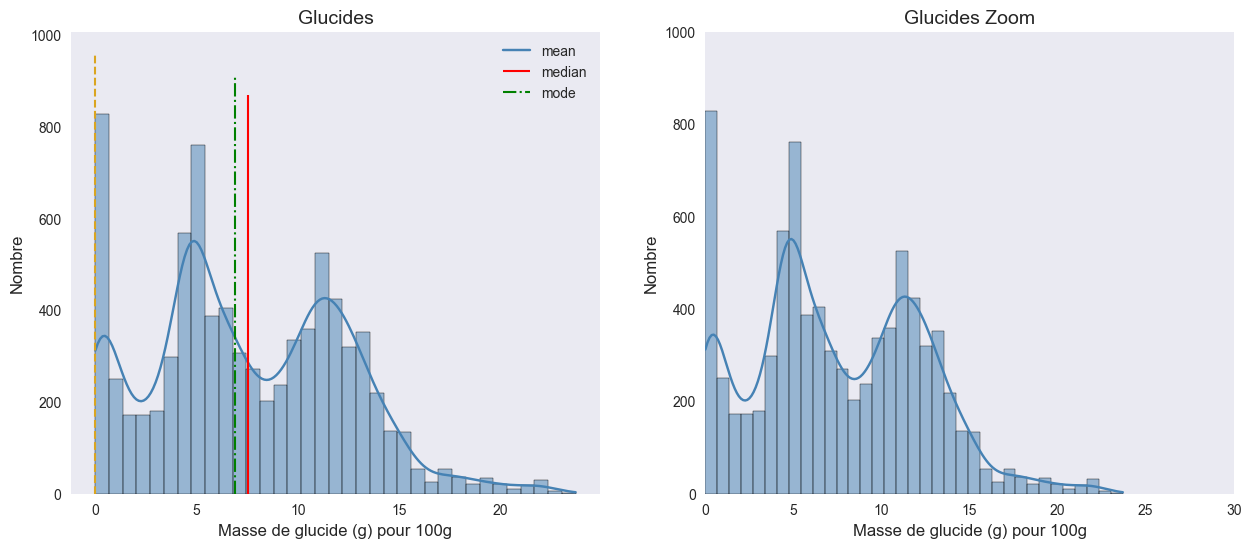

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


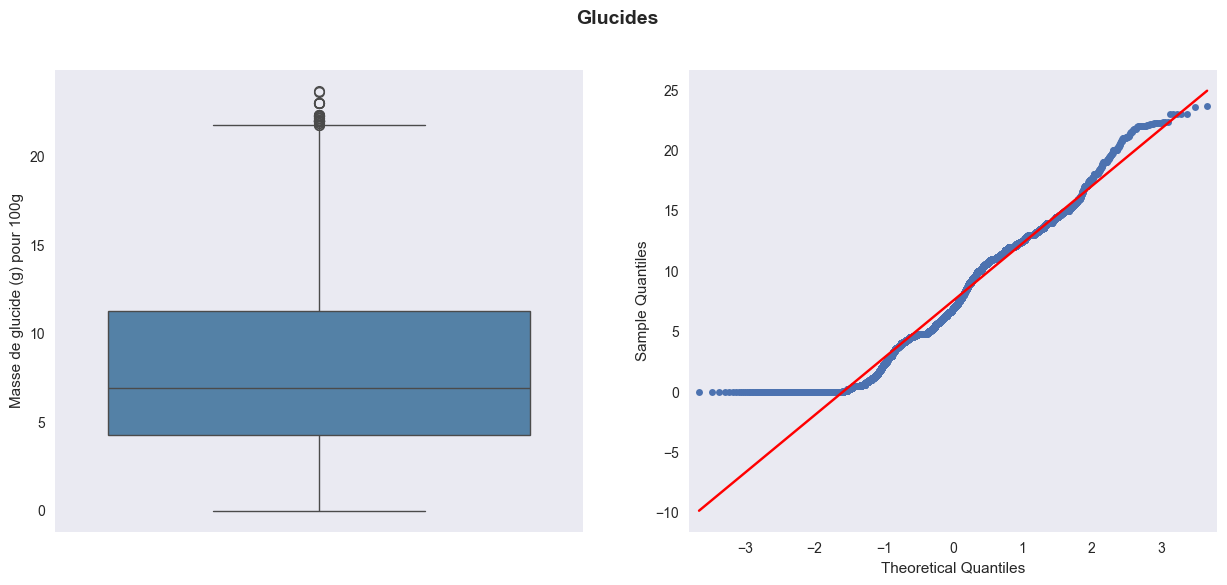

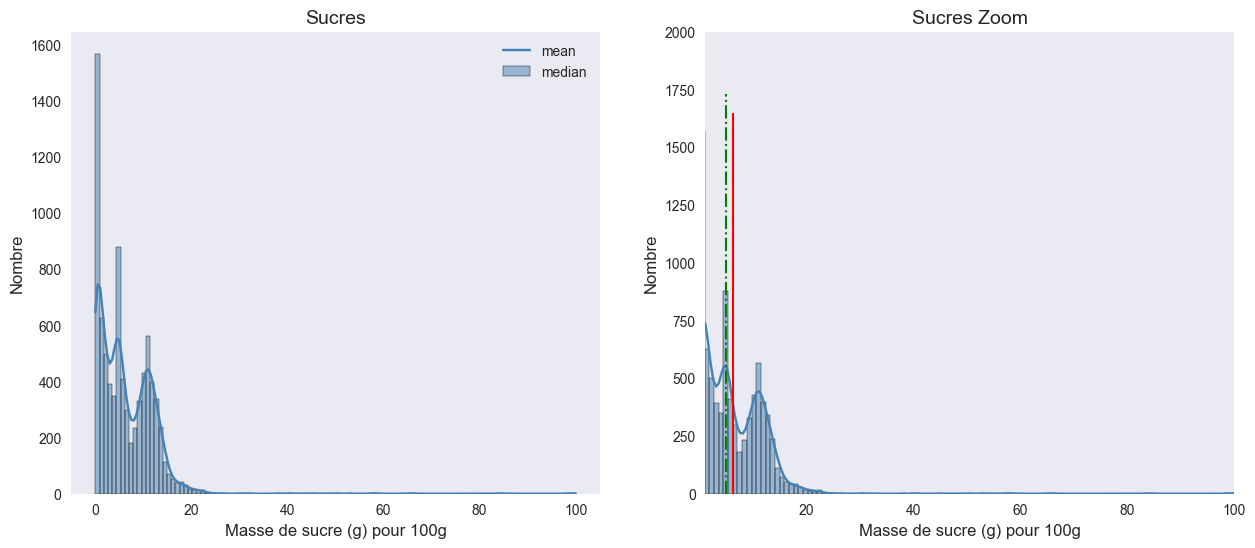

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


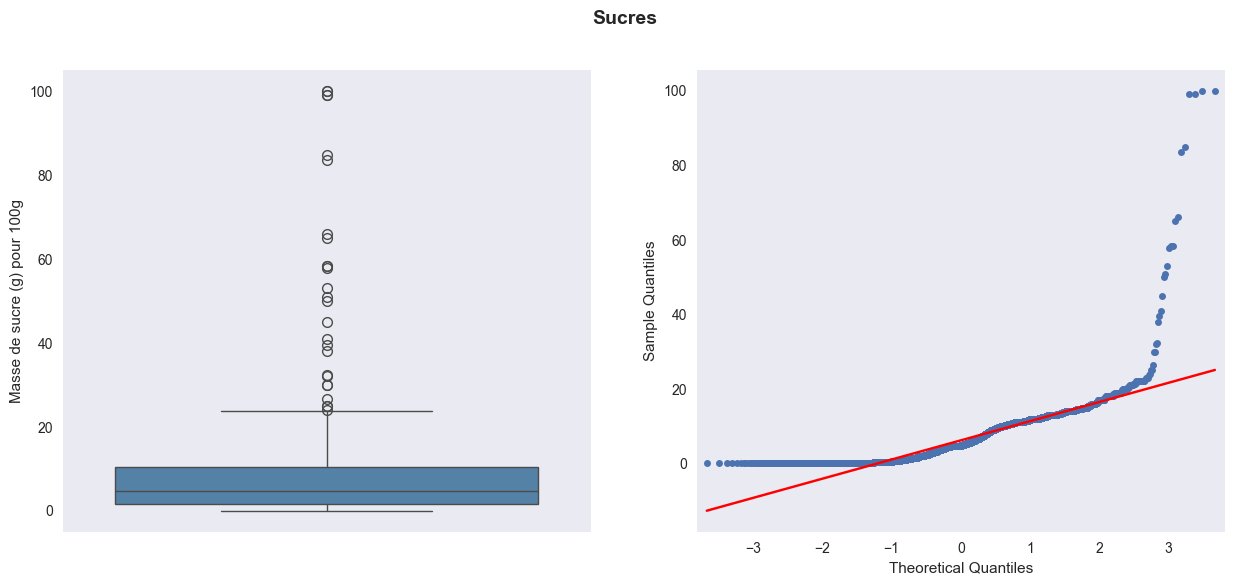

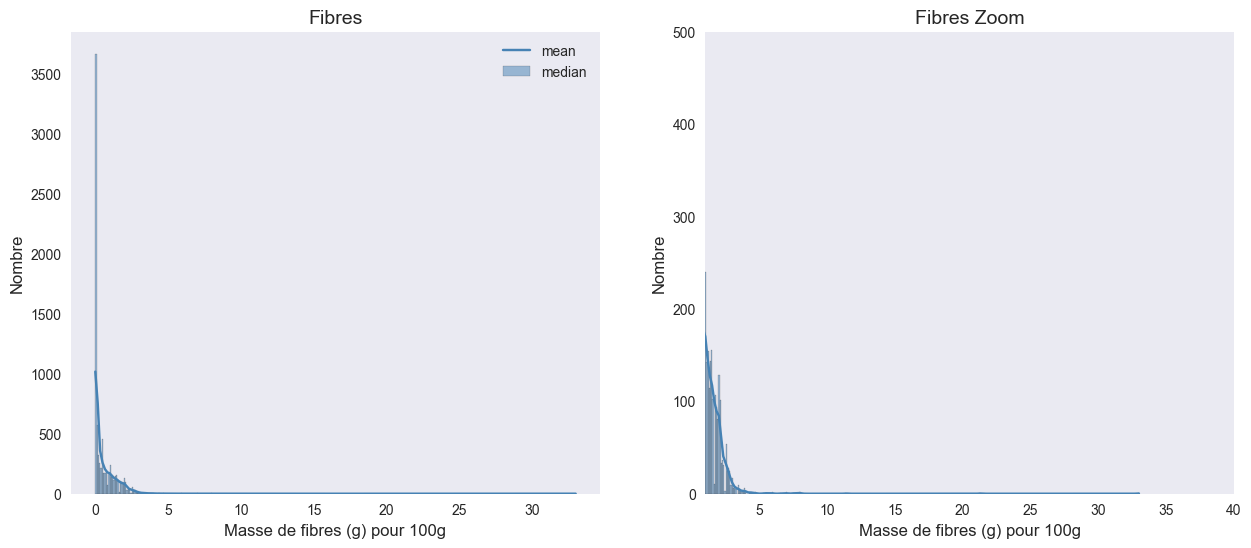

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


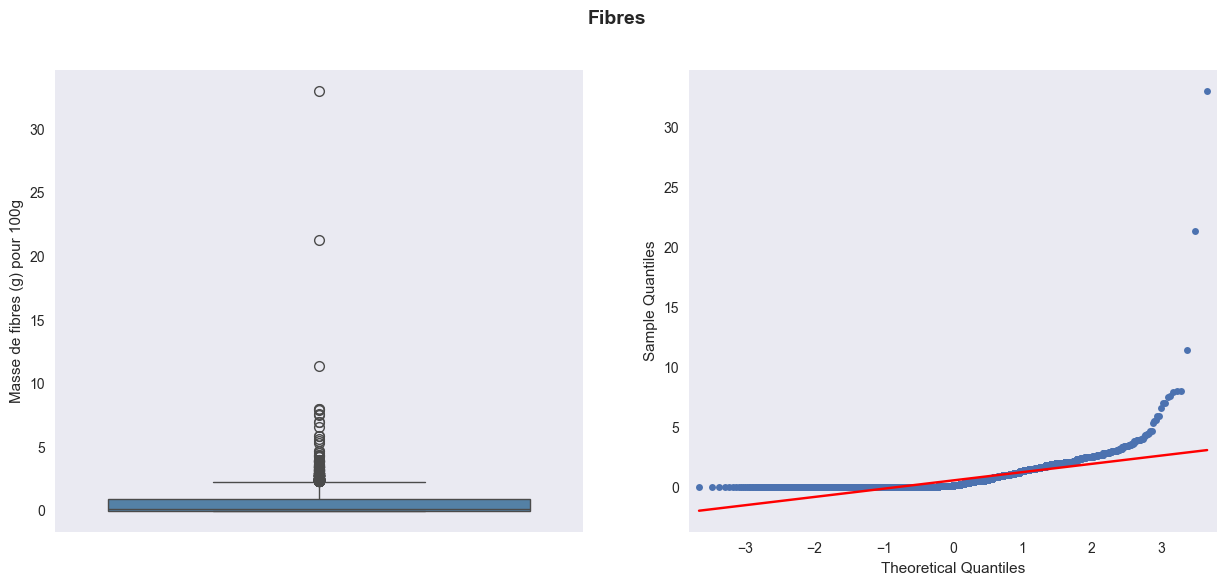

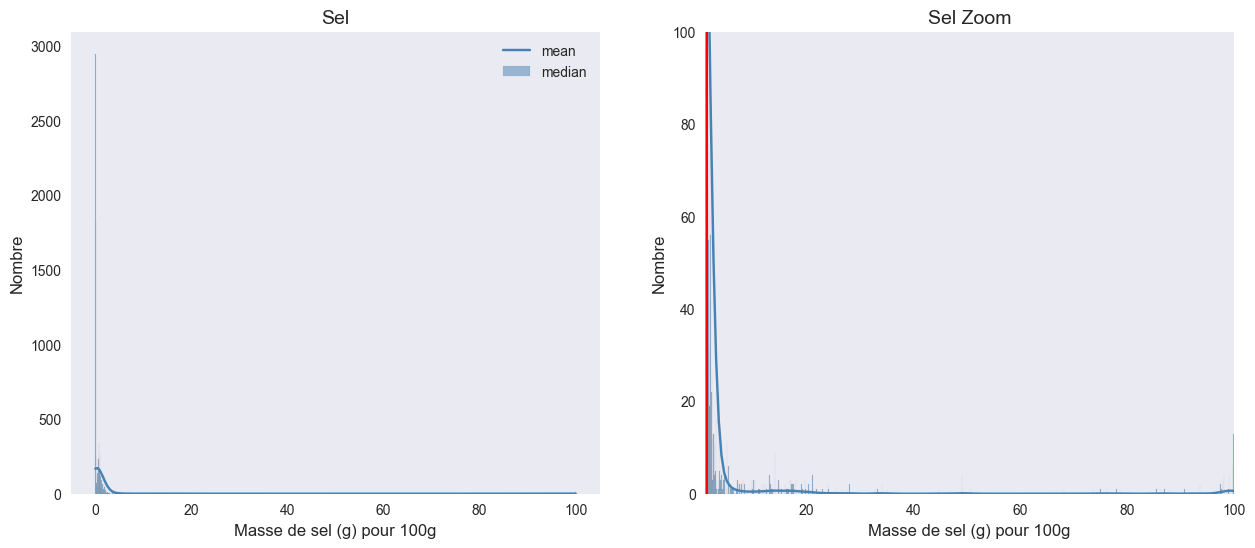

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


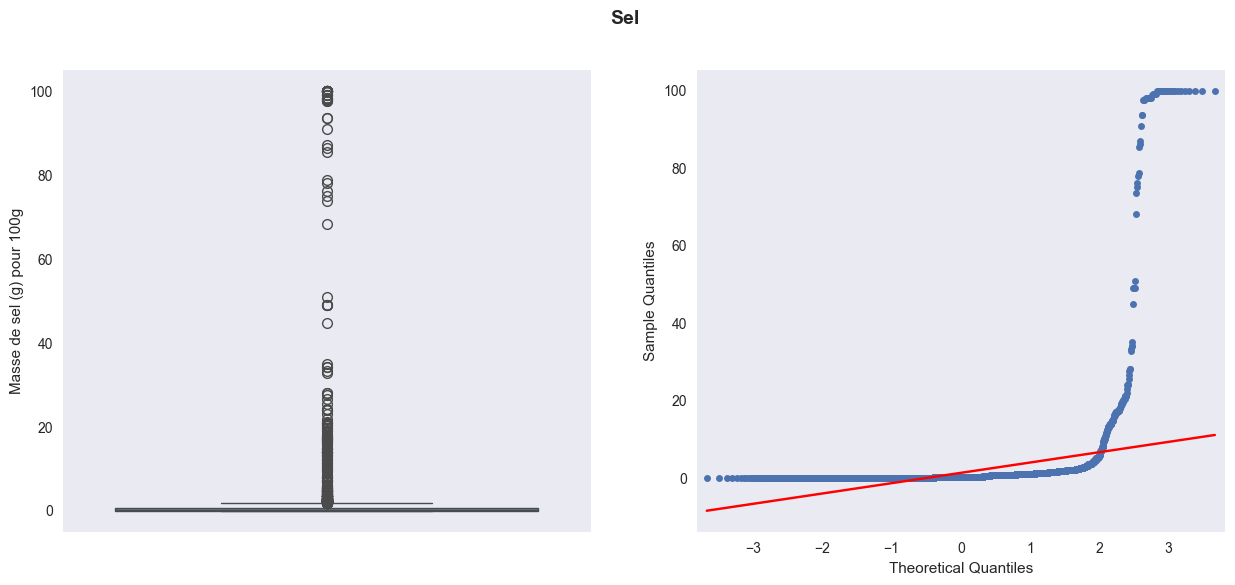

In [38]:
# Protéines
trace_histplot_gen_zoom(data, 'proteins_100g', 'Protéines', 'Masse de protéines (g) pour 100g', 1, 30, 0, 1000)
trace_dispersion_boxplot_qqplot(data, 'proteins_100g', 'Protéines', 'Masse de protéines (g) pour 100g')

# Lipides
trace_histplot_gen_zoom(data, 'fat_100g', 'Lipides', 'Masse de lipides (g) pour 100g', 1, 20, 0, 3000)
trace_dispersion_boxplot_qqplot(data, 'fat_100g', 'Lipides', 'Masse de lipides (g) pour 100g')

# Acides gras saturés
trace_histplot_gen_zoom(data, 'saturated_fat_100g', 'Acides gras saturés','Masse d\'acides gras saturés (g) pour 100g',1, 60, 0, 1000)
trace_dispersion_boxplot_qqplot(data, 'saturated_fat_100g','Acides gras saturés','Masse d\'acides gras saturés (g) pour 100g')

# Glucides
trace_histplot_gen_zoom(data, 'carbohydrates_100g', 'Glucides','Masse de glucide (g) pour 100g',0, 30, 0, 1000)
trace_dispersion_boxplot_qqplot(data, 'carbohydrates_100g', 'Glucides','Masse de glucide (g) pour 100g')

# Sucres
trace_histplot_gen_zoom(data, 'sugars_100g', 'Sucres','Masse de sucre (g) pour 100g',1, 100, 0, 2000, True, False, True)
trace_dispersion_boxplot_qqplot(data, 'sugars_100g', 'Sucres','Masse de sucre (g) pour 100g')

# Fibres
trace_histplot_gen_zoom(data, 'fiber_100g', 'Fibres','Masse de fibres (g) pour 100g',1, 40, 0, 500, True, False, True)
trace_dispersion_boxplot_qqplot(data, 'fiber_100g', 'Fibres','Masse de fibres (g) pour 100g')

# Sel
trace_histplot_gen_zoom(data, 'sel_100g', 'Sel','Masse de sel (g) pour 100g',1, 100, 0, 100, True, False, True)
trace_dispersion_boxplot_qqplot(data, 'sel_100g', 'Sel','Masse de sel (g) pour 100g')

## Energie

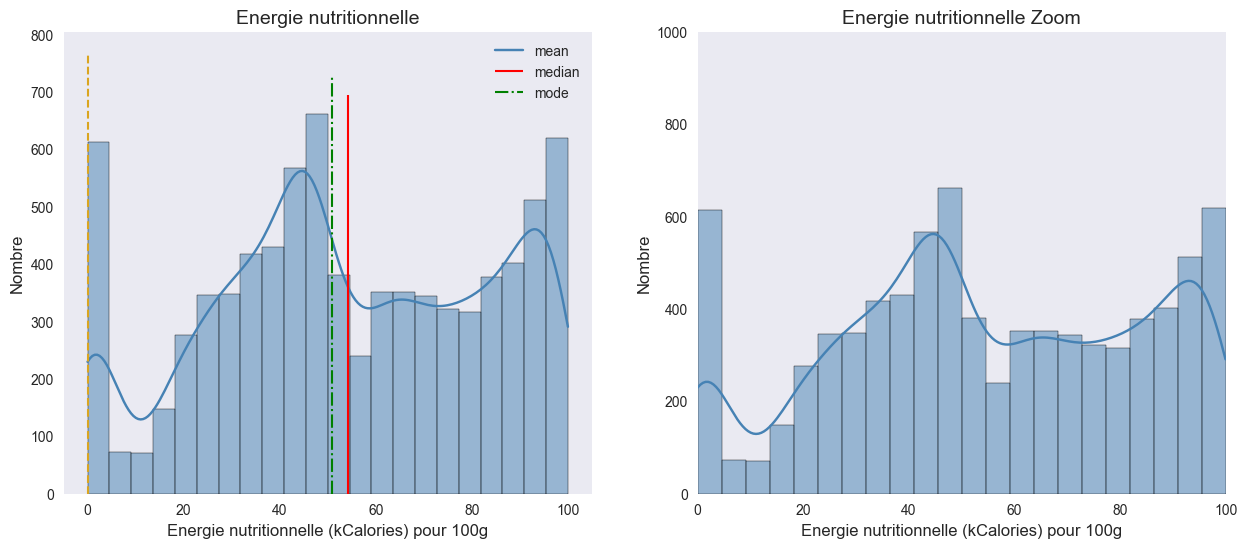

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


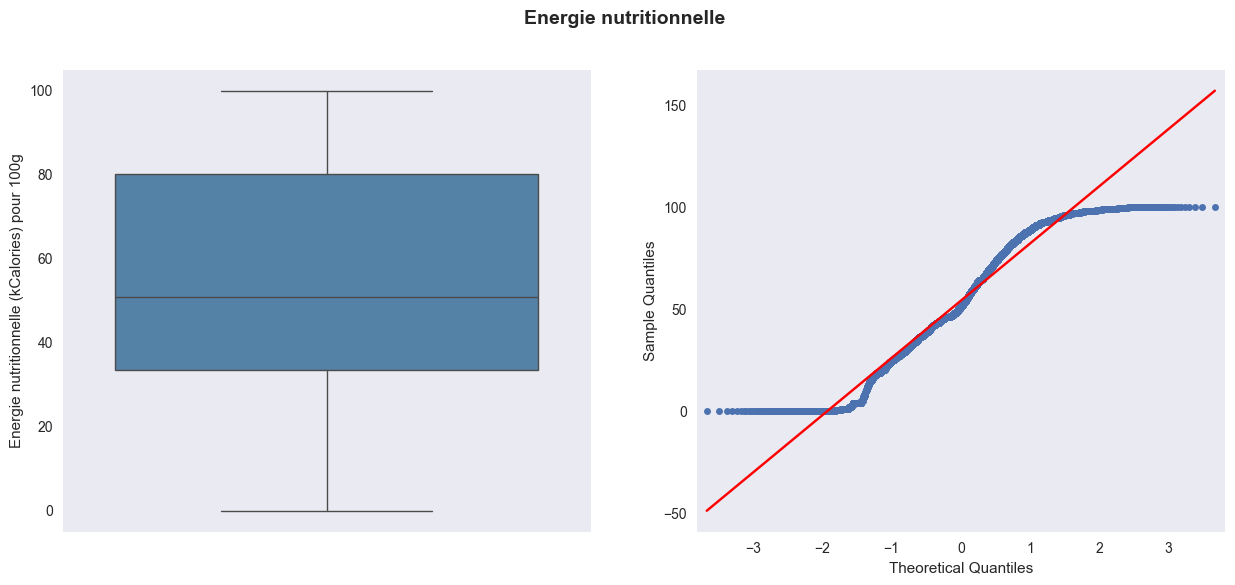

In [39]:
# Energie nutritionnelle
trace_histplot_gen_zoom(data, 'energy_100g', 'Energie nutritionnelle','Energie nutritionnelle (kCalories) pour 100g', 0, 100, 0, 1000, True, True)
trace_dispersion_boxplot_qqplot(data, 'energy_100g', 'Energie nutritionnelle','Energie nutritionnelle (kCalories) pour 100g')

In [40]:
def stat_descriptives(dataframe, liste_variables):
    """
    Statistiques descriptives moyenne, mediane, variance, écart-type,
    skewness et kurtosis du dataframe transmis en paramètre
    ----------
    @param IN : dataframe : DataFrame, obligatoire
                liste_variables : colonne dont on veut voir les stat descr
    @param OUT : dataframe des statistiques descriptives
    """
    liste_mean = ['mean']
    liste_median = ['median']
    liste_var = ['var']
    liste_std = ['std']
    liste_skew = ['skew']
    liste_kurtosis = ['kurtosis']
    liste_mode = ['mode']
    liste_cols = ['Desc']
    liste_max = ['Max']
    liste_min = ['Min']

    for col in liste_variables:
        liste_mean.append(dataframe[col].mean())
        liste_median.append(dataframe[col].median())
        liste_var.append(dataframe[col].var(ddof=0))
        liste_std.append(dataframe[col].std(ddof=0))
        liste_skew.append(dataframe[col].skew())
        liste_kurtosis.append(dataframe[col].kurtosis())
        liste_cols.append(col)
        liste_mode.append(dataframe[col].mode().to_string())
        liste_min.append(dataframe[col].min())
        liste_max.append(dataframe[col].max())

    data_stats = [liste_mean, liste_median, liste_var, liste_std, liste_skew,
                  liste_kurtosis, liste_mode, liste_min, liste_max]
    df_stat = pd.DataFrame(data_stats, columns=liste_cols)

    return df_stat.style.hide()

In [41]:
cols_quant_cont = ['fat_100g',
 'saturated_fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'sel_100g']

In [42]:
# Statistiques descriptives
stat_descriptives(data, cols_quant_cont)

## Bilan :

'''
##### Toutes les courbes des variables quantitatives continues sont asymétriques, avec un skewness positif, indiquant une distribution étalée à droite.
##### Les courbes sont moins aplaties que la distribution normale donc les observations sont plus concentrées d'après les kurtosis empiriques positifs. Exception pour la courbe des glucides, avec un kurtosos empirique négatif donc une distribution plus aplatie que la distribution normale.
##### Un pic autour de 0 pour toutes les variables quantitatives ne peuvent pas être imputées à des valeurs erronées, puisque certains produits ne contiennent ni lipides, ni glucides, ni protéines, ni sel...
'''

## Variables Quantitatives Discrètes

### Nutrition score

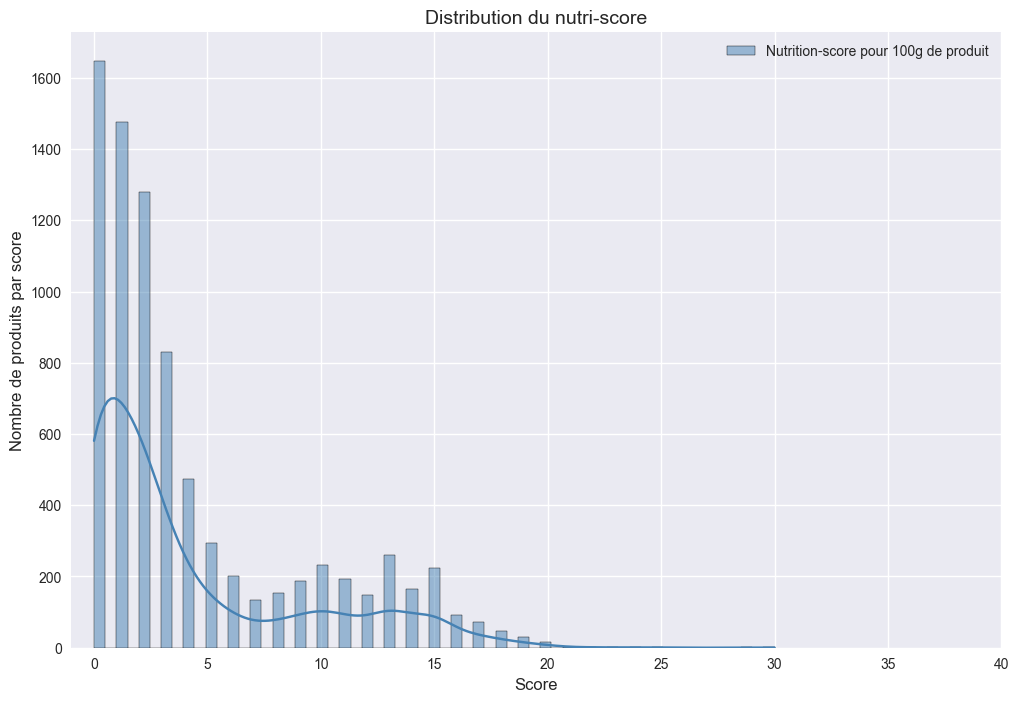

In [43]:
# Courbe de distribution du nutriscore
plt.figure(figsize=(12, 8))

sns.histplot(data['nutrition_score_fr_100g'], kde=True, color='SteelBlue', label='Nutrition-score pour 100g de produit')
plt.title("Distribution du nutri-score", fontsize=14)
plt.xlim(-1, 40)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Nombre de produits par score', fontsize=12)
plt.legend()
plt.show()

In [44]:
stat_descriptives(data, ['nutrition_score_fr_100g'])

## Repartition des produits par categories

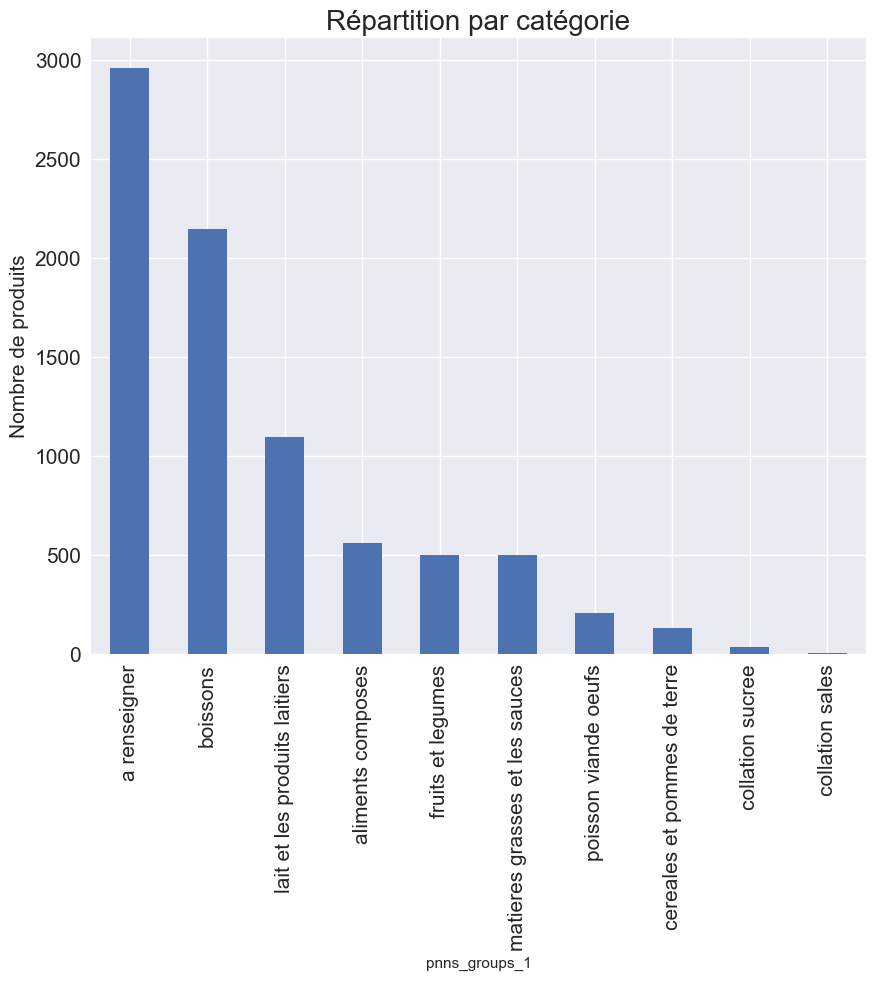

In [45]:
fig, ax = plt.subplots(figsize=(10, 8))

data['pnns_groups_1'].value_counts().plot(kind='bar')
ax.set_title('Répartition par catégorie', size=20)
ax.tick_params(labelsize=15)
ax.set_ylabel('Nombre de produits', size=15)
plt.show()

In [46]:
cat_a_renseigner = len(data[data['pnns_groups_1'] == 'a renseigner'])
cat_null = len(data[data['pnns_groups_1'].isnull()])
print(f"{(cat_a_renseigner + cat_null) / data.shape[0] * 100:.0f}% des produits sont sans catégories.")

36% des produits sont sans catégories.


## Repartition des marques

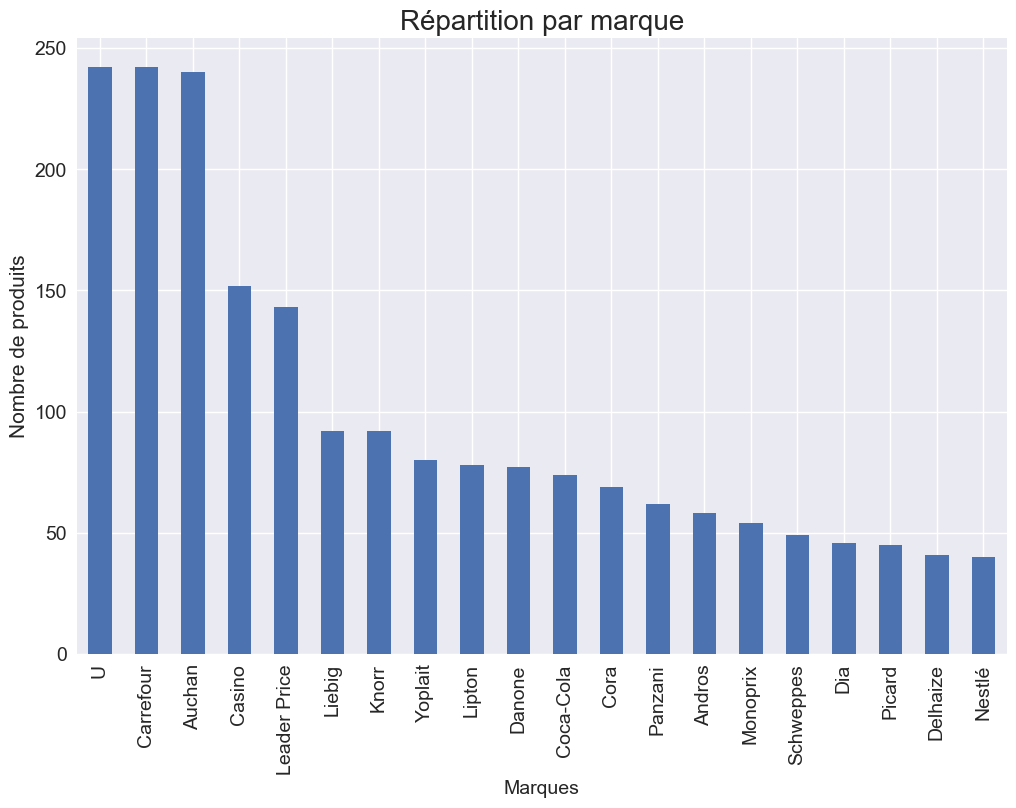

In [47]:
fig, ax = plt.subplots(figsize=(12, 8)
                      )
data['brands'].value_counts().head(20).plot(kind='bar')
ax.set_title("Répartition par marque", size=20)
ax.tick_params(labelsize=14)
ax.set_xlabel("Marques", size=14)
ax.set_ylabel('Nombre de produits', size=15)

plt.show()

#### On remarque que les grandes distributions sont dans le top mais on remarque egalement des marques de produit

## Repartition des notes des produits

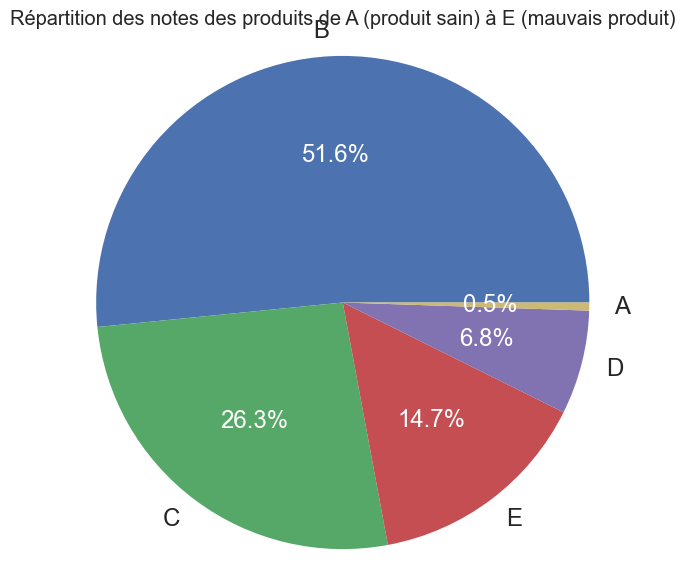

In [48]:
grades = data['nutrition_grade_fr'].value_counts()

fig, ax = plt.subplots(figsize=(7, 7))

patches, texts, autotexts = ax.pie(grades.values, labels=grades.index, autopct='%1.1f%%')
for t in texts:
    t.set_text(t.get_text().upper())
    t.set_size('xx-large')
for t in autotexts: 
    t.set_size('xx-large')
    t.set_color('w')
ax.set_title('Répartition des notes des produits de A (produit sain) à E (mauvais produit)', size='x-large')
ax.axis('equal')

plt.show()

#### On remarque que plus de la moitie des produits sont classe dans la Cat B

## Rapport des valeurs energetiques

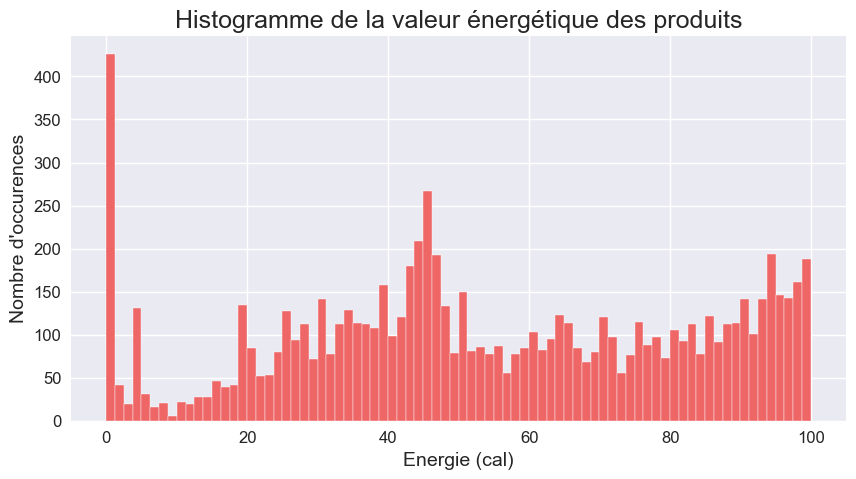

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(data['energy_100g'], bins=80, histtype='bar', color='#EE6666', edgecolor='white')
ax.set_title("Histogramme de la valeur énergétique des produits", size=18)
ax.set_xlabel("Energie (cal)", size=14)
ax.set_ylabel("Nombre d'occurences", size=14)
ax.tick_params(labelsize=12)

plt.show()

In [50]:
data.nlargest(10, 'energy_100g')

product_name                     brands  \
15   préparation à base de lait de coco  Thai Agri Foods Co.  Ltd.   
55         Beurre D'arachide (croquant)                Compliments   
61       Thon Pâle (émietté Dans L'eau)                Clover leaf   
62                 Thon pâle en morceau                Clover leaf   
63                              Nutella                    Ferrero   
65                      Sauce à Lasagne                    Gattuso   
74               Mayo, Vraie Mayonnaise                      Kraft   
102                    Compote Rhubarbe                Bonne Maman   
181                             Gäddsas                       Ikea   
237            Jambon cuit sans couenne        Dulano,Gebirgsjäger   

    nutrition_grade_fr                   pnns_groups_1  energy_100g  fat_100g  \
15                   C                    a renseigner    99.904398     10.00   
55                   C                    a renseigner    99.904398      6.65   
61                   B                    a renseigner    99.904398      0.80   
62                   D                    a renseigner    99.904398      1.31   
63                   D                    a renseigner    99.904398      1.67   
65                   D                    a renseigner    99.904398      4.50   
74                   B                    a renseigner    99.904398      4.45   
102                  C                    a renseigner    99.904398      0.23   
181                  C  matieres grasses et les sauces    99.904398      6.87   
237                  C            poisson viande oeufs    99.904398      2.00   

     saturated_fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
15                 8.33               3.330         3.33         0.0   
55                 8.00               6.463         3.00         1.0   
61                 0.32               0.000         0.00         0.0   
62                 0.20               1.800         0.00         0.0   
63                 2.00              15.790        11.00         1.0   
65                 2.00              11.000         8.00         1.0   
74                 1.50              11.523         0.00         0.0   
102                0.00              21.490        20.00         0.0   
181                6.00               7.153         1.50         0.0   
237                0.80               1.000         0.90         0.5   

     proteins_100g  nutrition_score_fr_100g    temp  sel_100g  
15             0.0                      9.0  103.32   0.08382  
55             3.0                      6.0   13.90   0.00450  
61            24.0                      0.0  103.20   0.96012  
62            20.0                     11.0   80.00   3.20000  
63             1.0                     13.0    5.90  10.00000  
65             4.0                     12.0  102.40   4.50000  
74             0.1                      2.0    0.40   0.07000  
102            0.0                      5.0    0.00   0.00000  
181            0.9                      9.0    3.60   0.83000  
237           19.0                      5.0   98.95   2.28600

#### Top 10 des aproduits les plus calorifiques

## Distribution des variables numeriques

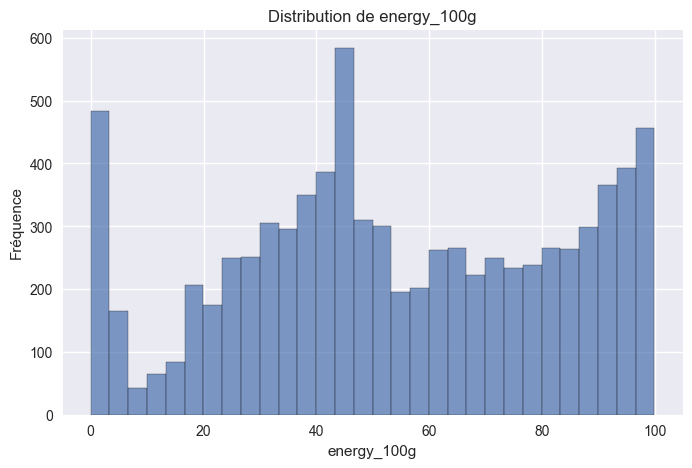

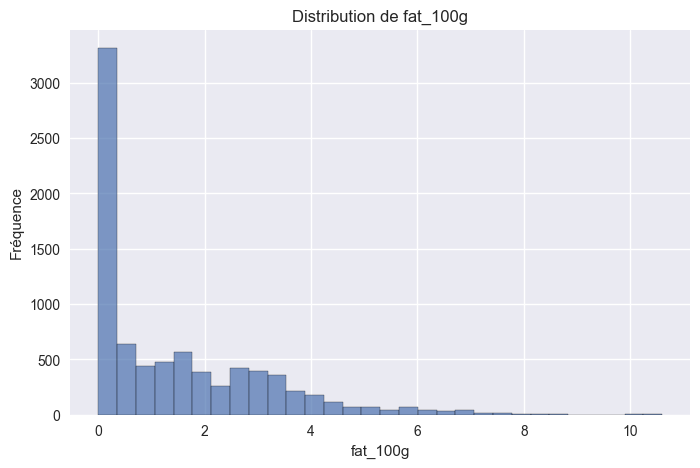

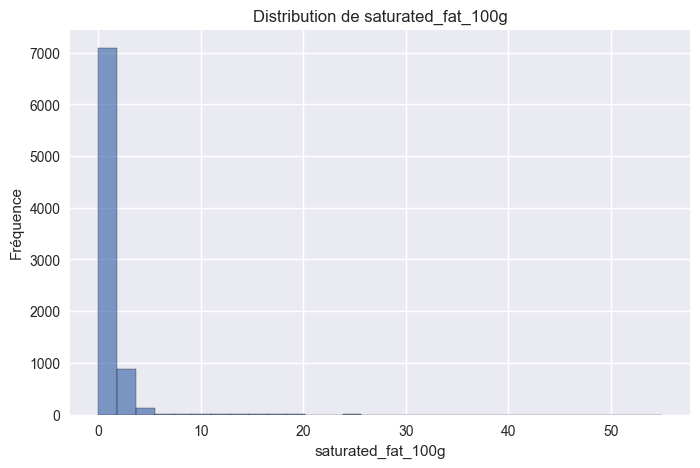

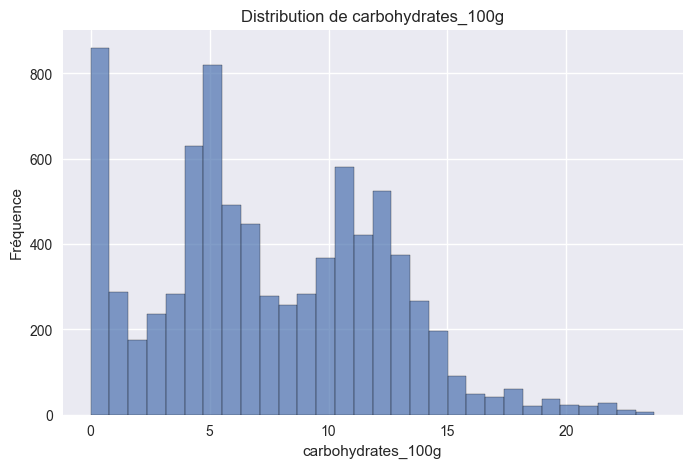

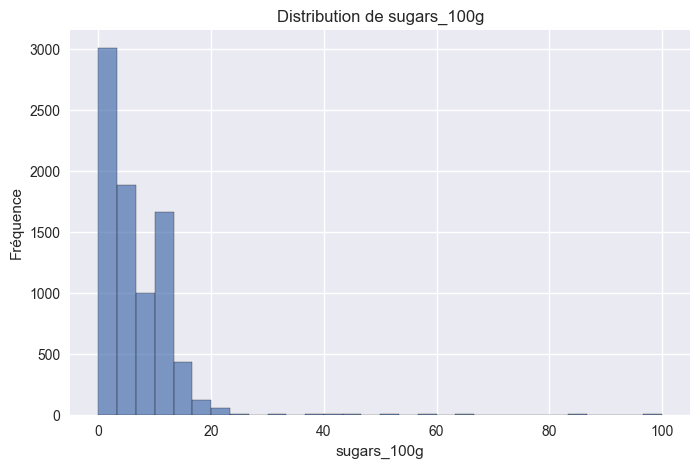

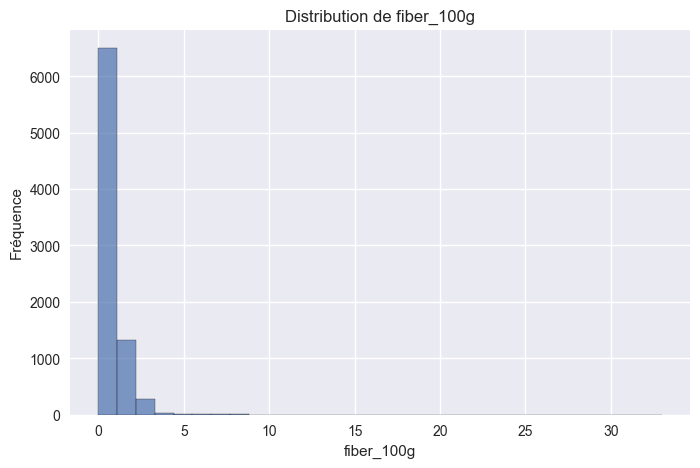

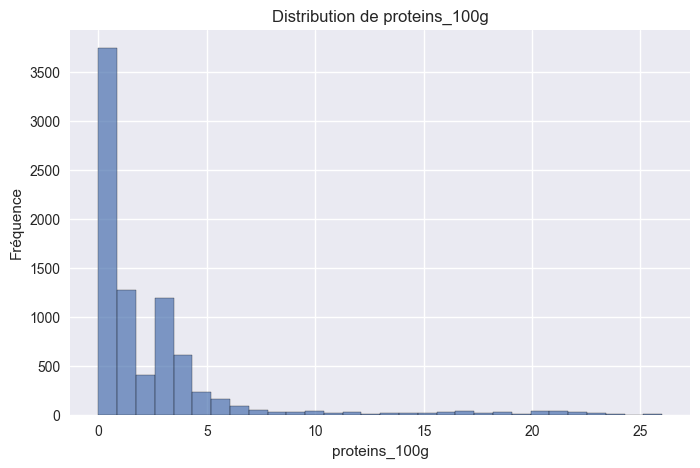

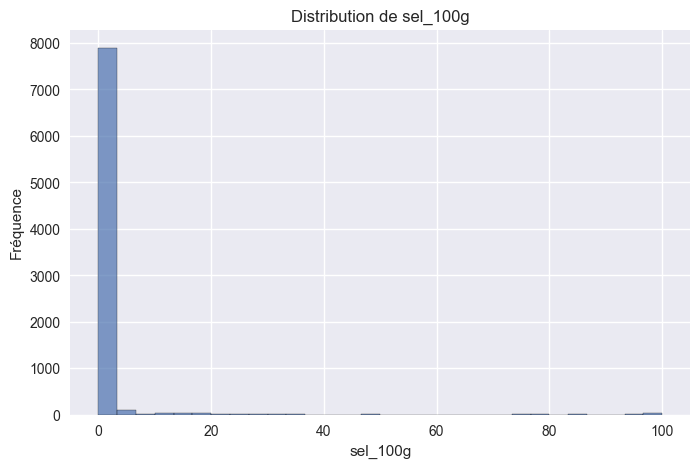

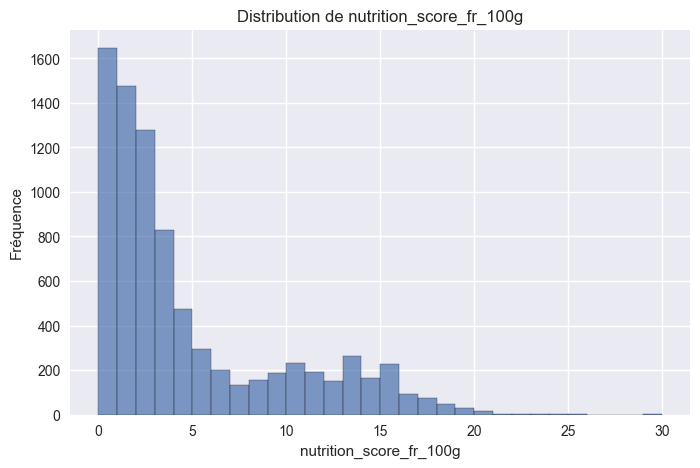

In [51]:
# Sélection des colonnes numériques pour l'analyse univariée
numeric_columns = [
    "energy_100g", "fat_100g", "saturated_fat_100g",
    "carbohydrates_100g", "sugars_100g", "fiber_100g",
    "proteins_100g", "sel_100g", "nutrition_score_fr_100g"
]

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[col].dropna(), bins=30, edgecolor="k", alpha=0.7)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.grid(True)
    plt.show()

#### La majorité des produits contiennent peu de lipides. La distribution est très excentrée vers la gauche. Constat similaire sur les graisses saturees.
#### Pour les carbonhydrates la distribution est légèrement bi-modale. La majorité des produits contiennent peu de glucides. Concernant le sugars on retrouve une distribution similaire aux graisses saturees.
#### Pour les proteines nous avons une distribution tres excentrees vers la gauche encore une fois. La majorite des produits possedent moins de 10% de proteines.
#### Concernant les fibres, excentre vers la gauche, de 0 a 5g pour la pluspart des produits.
#### COncernant le Salt et le Sodium qui conceptuellement sont similaire, on retrouve une concentration vers la gauche elevee, proche de 0.
#### On retrouve plusieurs pics, plus ou moins concentres, 2, 10, 15.

## Analyse Bivariee

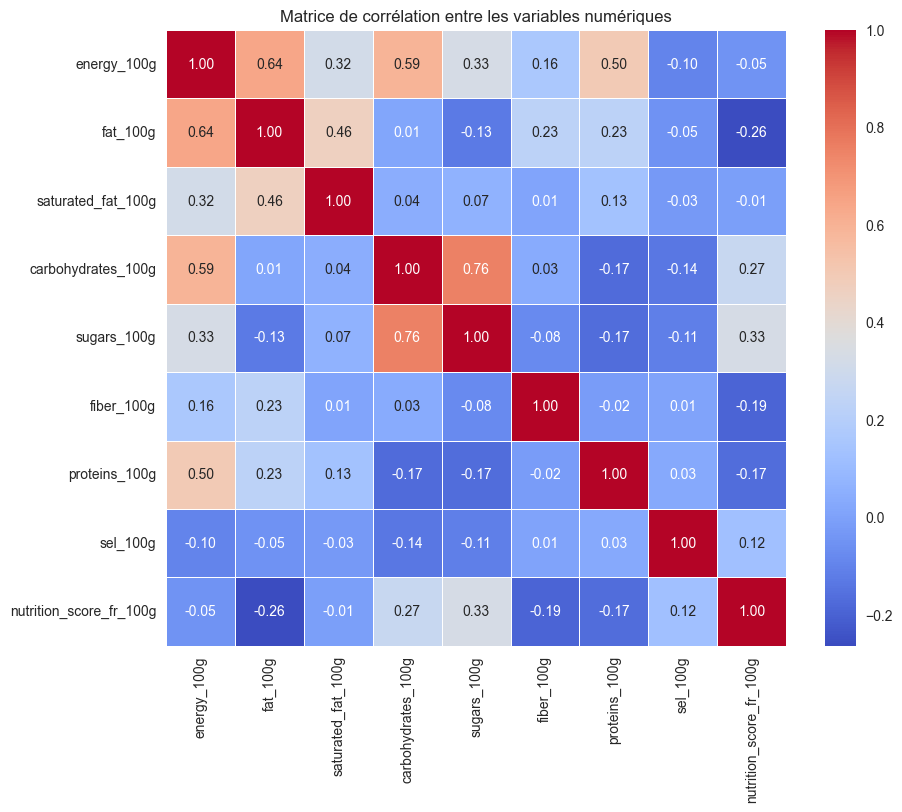

In [52]:
# Création d'une matrice de corrélation pour les colonnes numériques
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5, 
    cbar=True
)
plt.title("Matrice de corrélation entre les variables numériques")
plt.show()

## identification des variables correlees

In [53]:
# Tri des variables les plus corrélées avec la cible `nutrition_score_fr_100g`
target = "nutrition_score_fr_100g"
correlations_with_target = correlation_matrix[target].sort_values(ascending=False)

# Variables les plus corrélées (positives et négatives)
top_positive_correlations = correlations_with_target[1:4]  # Top 3 positives
top_negative_correlations = correlations_with_target[-3:]  # Top 3 négatives

top_positive_correlations, top_negative_correlations

(sugars_100g           0.332588
 carbohydrates_100g    0.274100
 sel_100g              0.123449
 Name: nutrition_score_fr_100g, dtype: float64,
 proteins_100g   -0.168336
 fiber_100g      -0.190608
 fat_100g        -0.264005
 Name: nutrition_score_fr_100g, dtype: float64)

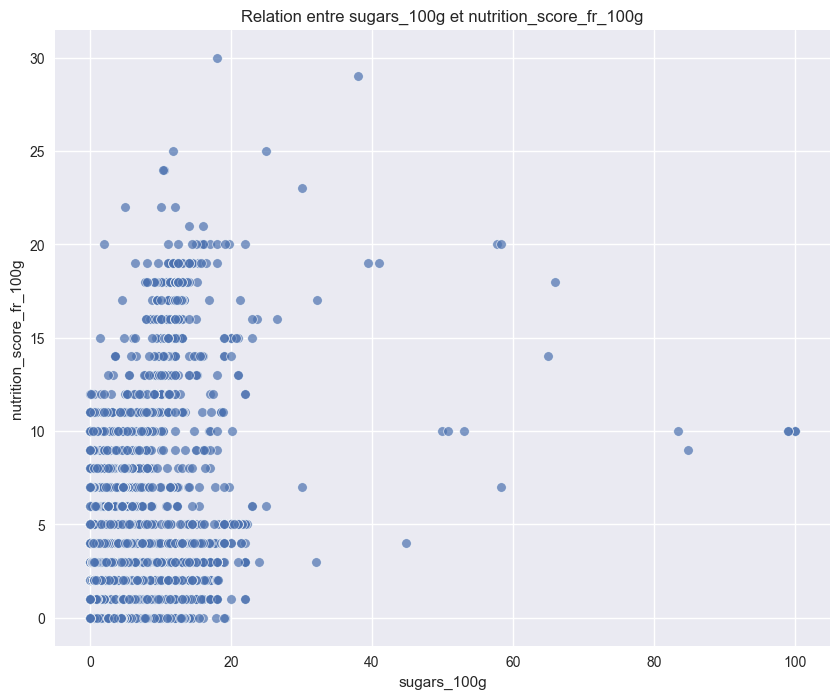

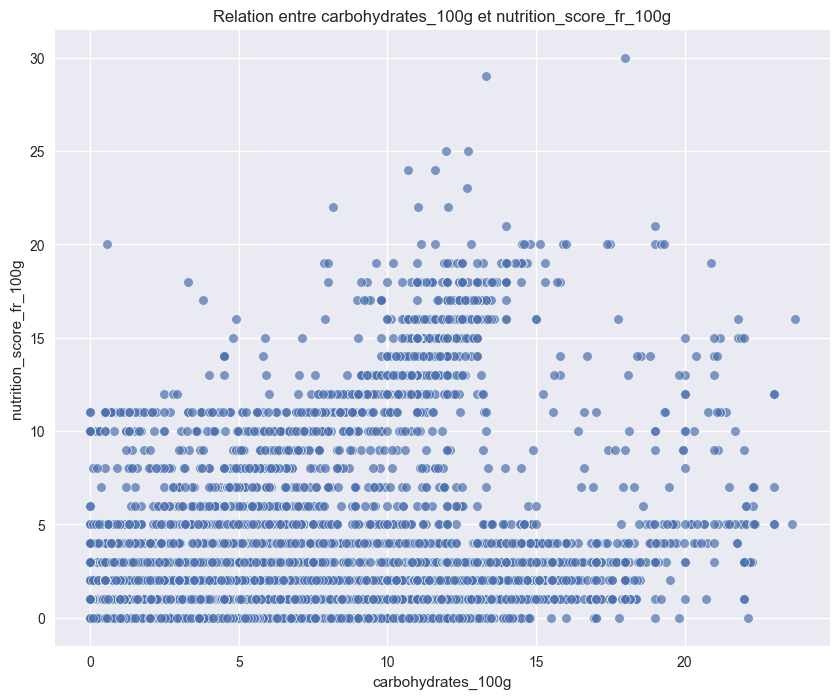

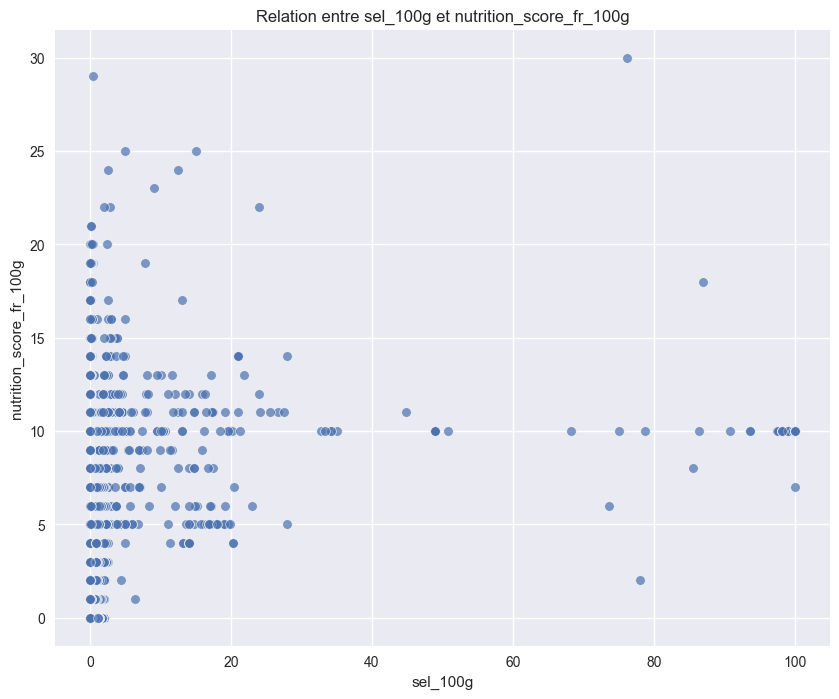

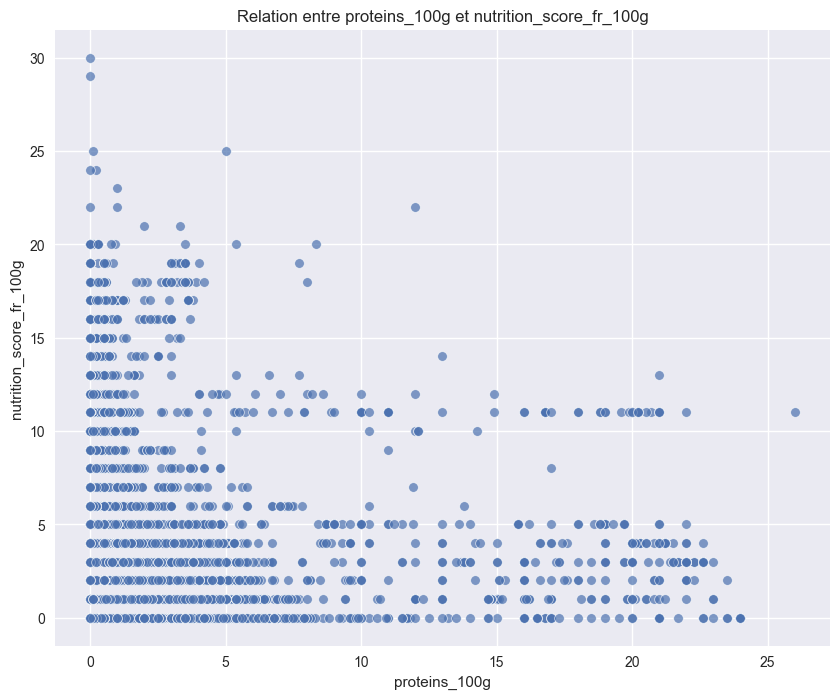

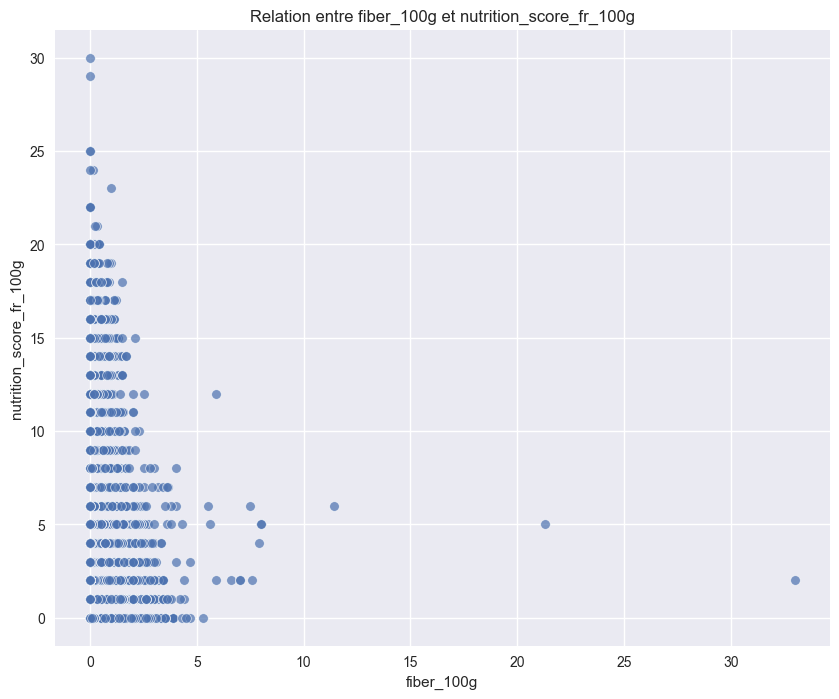

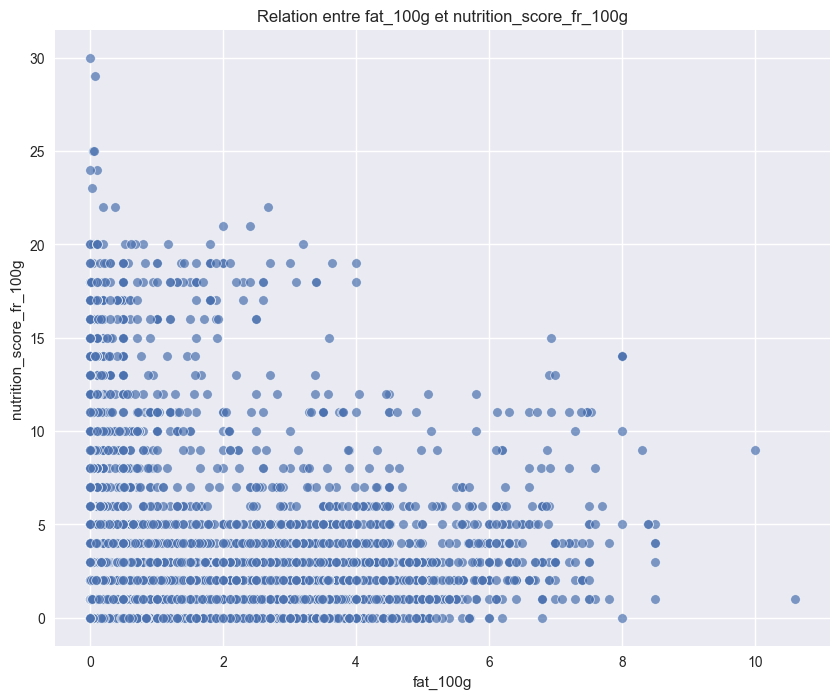

In [54]:
# Scatter plots pour les relations significatives avec la cible
significant_columns = list(top_positive_correlations.index) + list(top_negative_correlations.index)

for col in significant_columns:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data[col], y=data[target], alpha=0.7)
    plt.title(f"Relation entre {col} et {target}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.grid(True)
    plt.show()

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\1631454618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[target], y=data[col], inner="box", palette="muted")


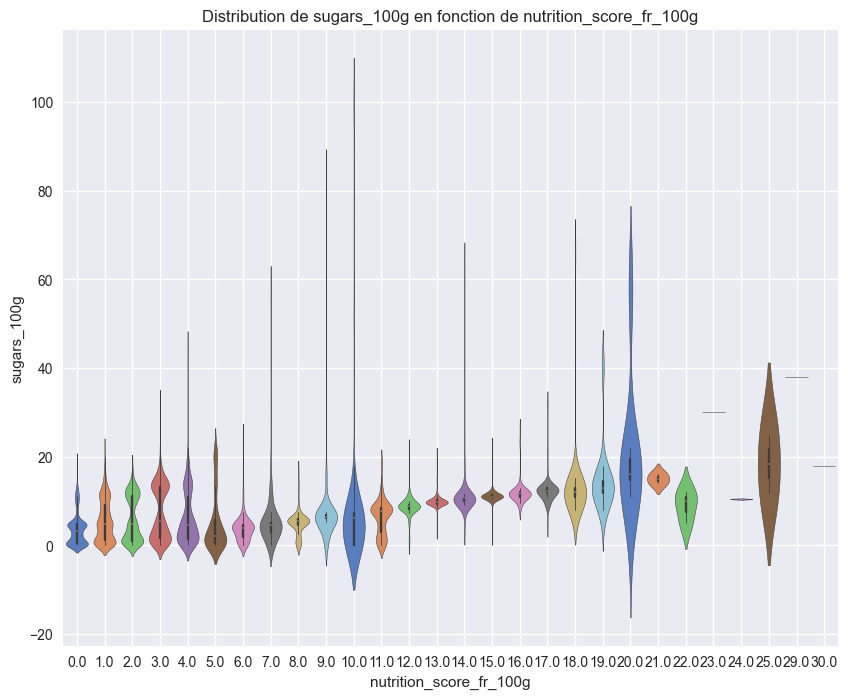

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\1631454618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[target], y=data[col], inner="box", palette="muted")


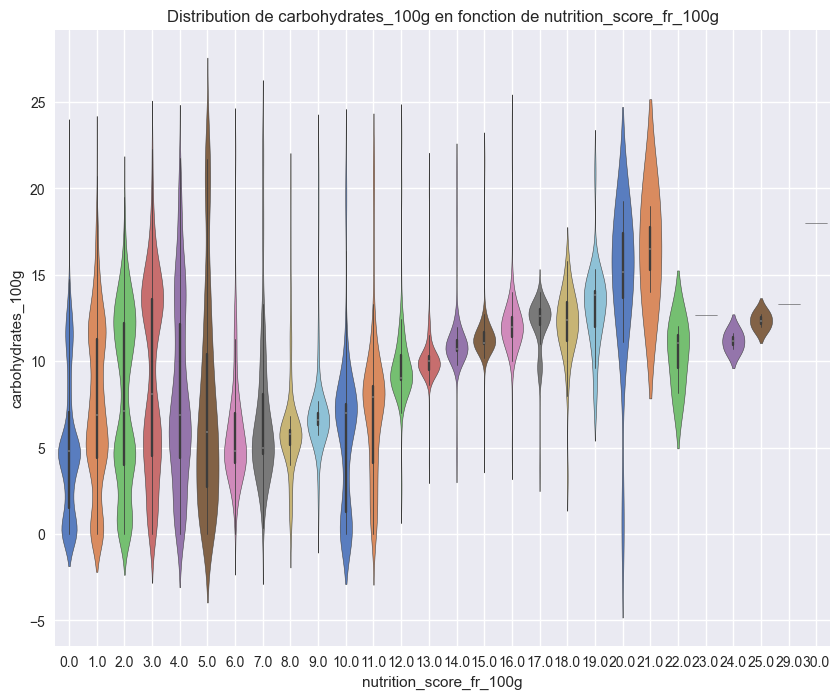

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\1631454618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[target], y=data[col], inner="box", palette="muted")


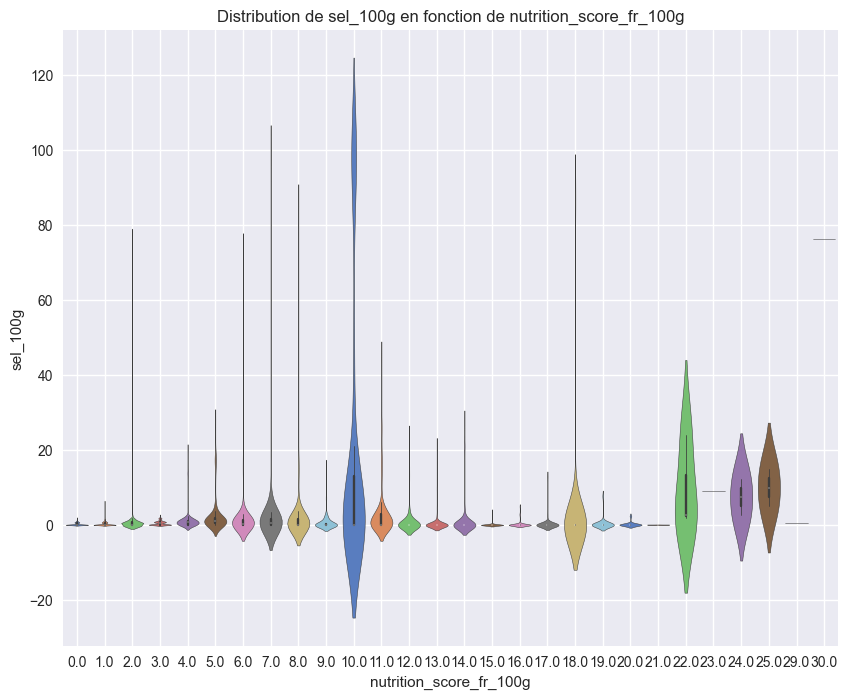

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\1631454618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[target], y=data[col], inner="box", palette="muted")


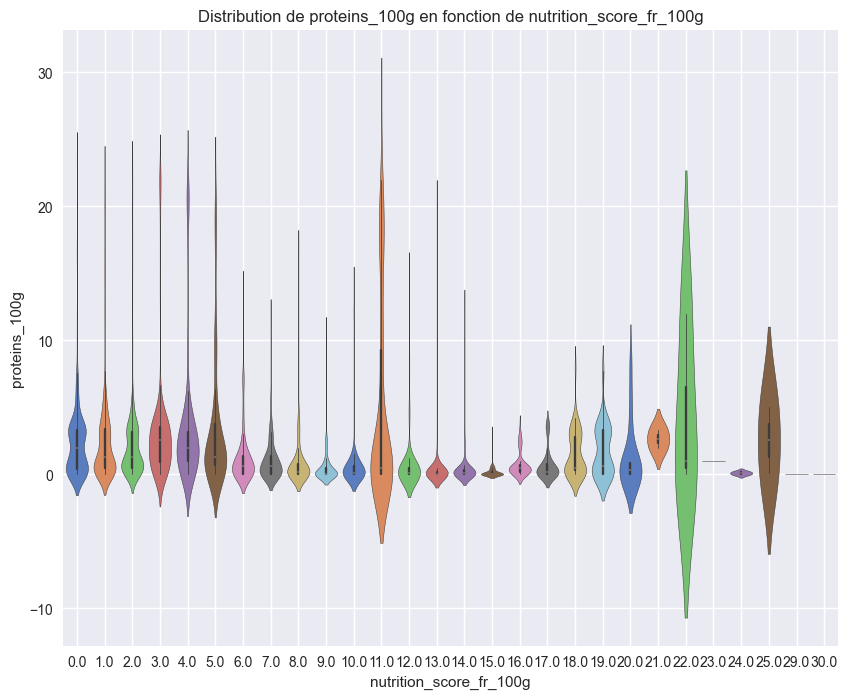

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\1631454618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[target], y=data[col], inner="box", palette="muted")


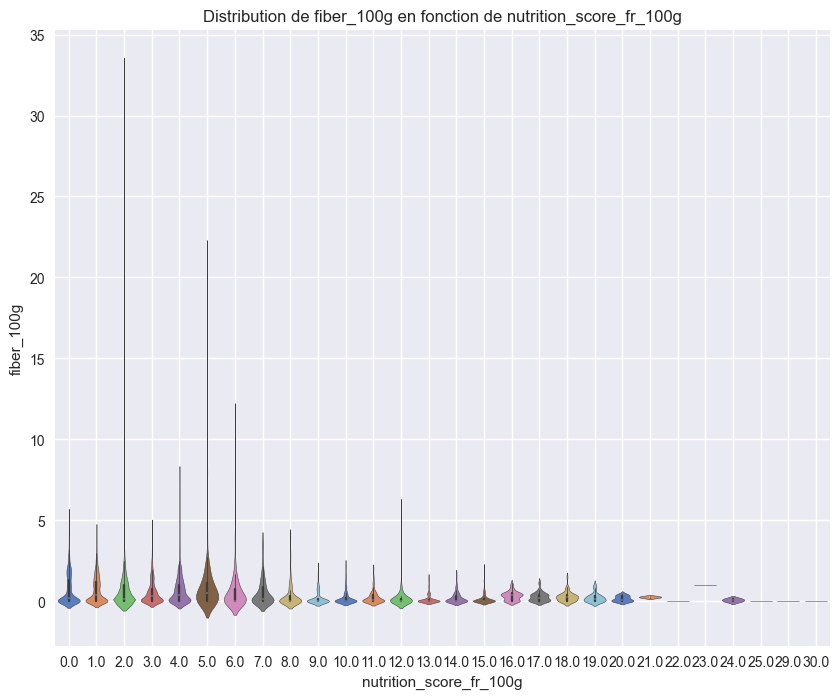

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\1631454618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[target], y=data[col], inner="box", palette="muted")


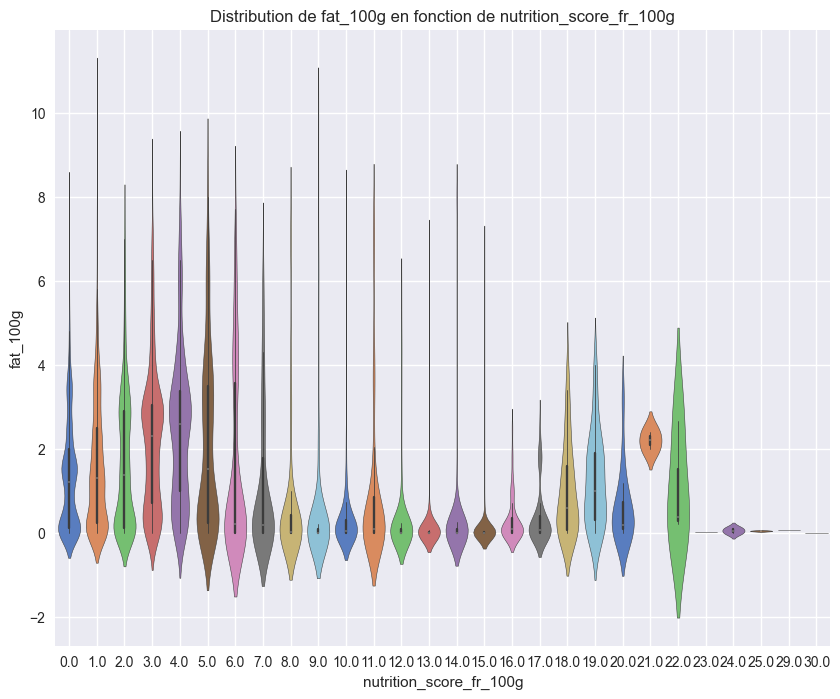

In [55]:
# Diagrammes de violon pour analyser les distributions des variables corrélées
for col in significant_columns:
    plt.figure(figsize=(10, 8))
    sns.violinplot(x=data[target], y=data[col], inner="box", palette="muted")
    plt.title(f"Distribution de {col} en fonction de {target}")
    plt.xlabel(target)
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

## Analyse Multi variees

### ACP

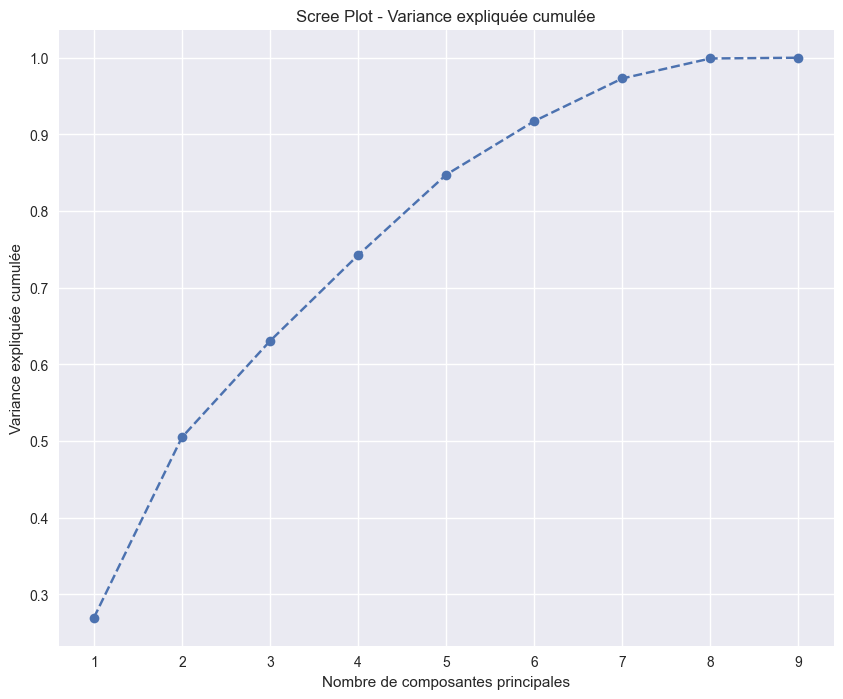

Nopmbre de composante pour expliquer au moins 90% de la variance : 6


In [56]:
# Normalisation des données
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data[numeric_columns].dropna())

# Application de l'ACP
pca = PCA()
pca_result = pca.fit_transform(data_normalized)

# Variance expliquée par composante
explained_variance_ratio = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title("Scree Plot - Variance expliquée cumulée")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.grid(True)
plt.show()

# Nombre optimal de composantes pour expliquer au moins 90% de la variance
optimal_components = (explained_variance_ratio.cumsum() >= 0.90).argmax() + 1
print(f"Nopmbre de composante pour expliquer au moins 90% de la variance : {optimal_components}")


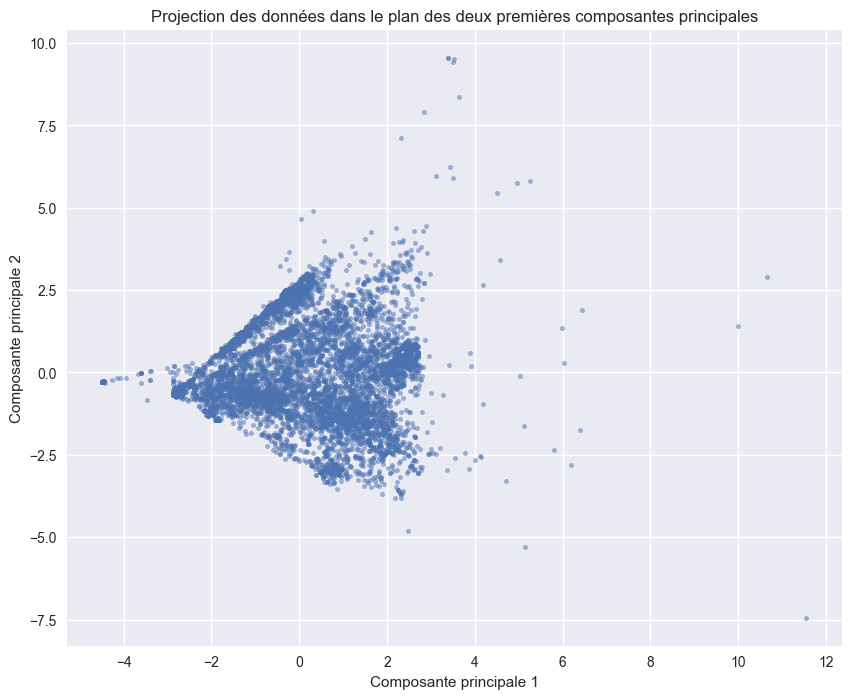

In [57]:
# Réduction des données à 6 composantes principales
pca_reduced = PCA(n_components=6)
pca_result_reduced = pca_reduced.fit_transform(data_normalized)

# Projection dans le plan des deux premières composantes
plt.figure(figsize=(10, 8))
plt.scatter(pca_result_reduced[:, 0], pca_result_reduced[:, 1], alpha=0.5, s=10)
plt.title("Projection des données dans le plan des deux premières composantes principales")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()


### Cercle des correlations composantes principale 1 et 2

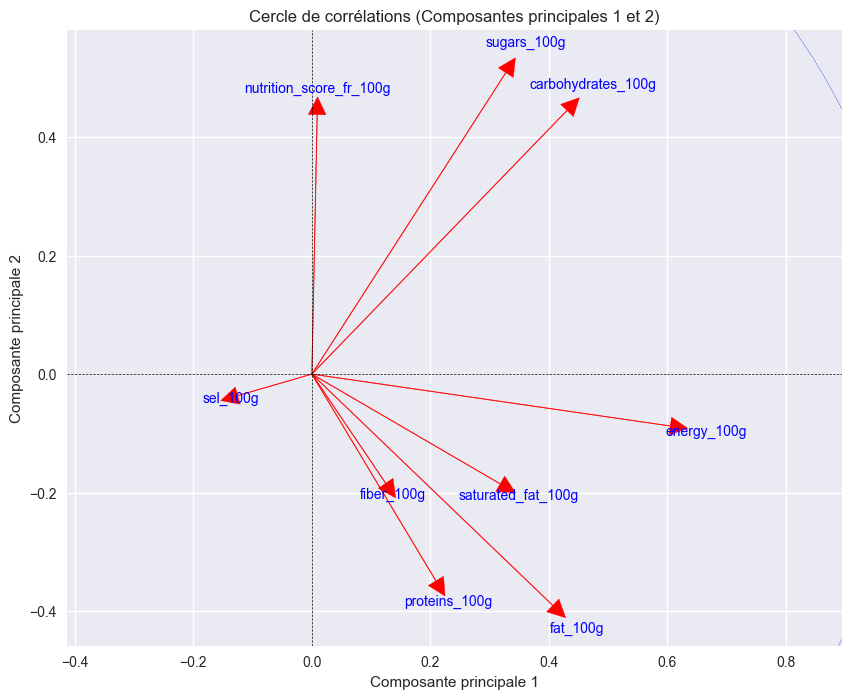

In [58]:
# Calcul des composantes principales et des contributions des variables
components = pca.components_[:2]  # Les deux premières composantes principales
variable_names = numeric_columns

# Cercle de corrélations
plt.figure(figsize=(10, 8))
for i, (x, y) in enumerate(zip(components[0], components[1])):
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, color='r')
    plt.text(x * 1.1, y * 1.1, variable_names[i], color='b', ha='center', va='center')

# Ajout des éléments graphiques
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(plt.circle)
plt.title("Cercle de corrélations (Composantes principales 1 et 2)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.axis('equal')
plt.show()

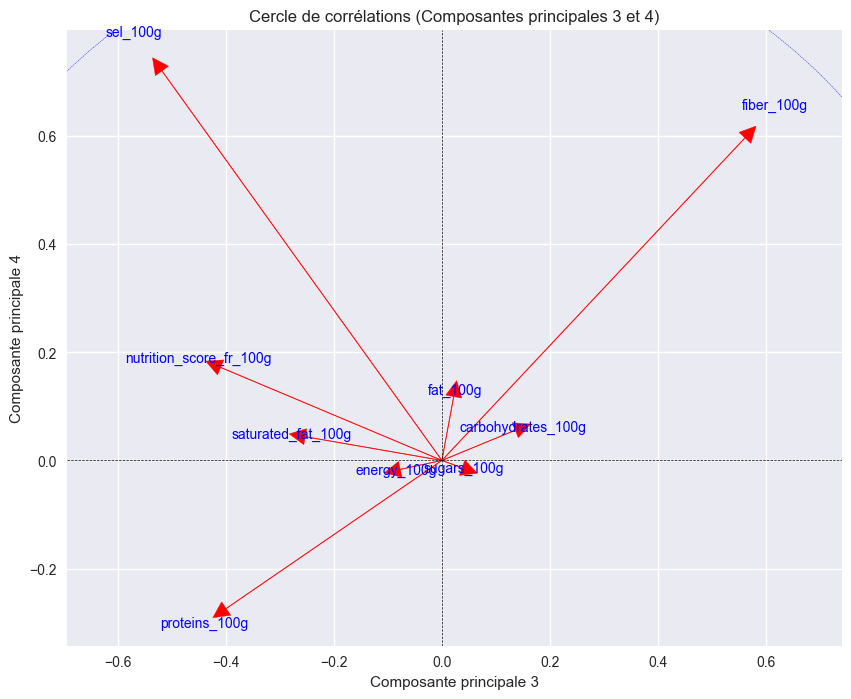

In [59]:
# Cercle de corrélations pour les composantes 3 et 4
plt.figure(figsize=(10, 8))
components_34 = pca.components_[2:4]  # Composantes 3 et 4
for i, (x, y) in enumerate(zip(components_34[0], components_34[1])):
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, color='r')
    plt.text(x * 1.1, y * 1.1, variable_names[i], color='b', ha='center', va='center')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(plt.circle)
plt.title("Cercle de corrélations (Composantes principales 3 et 4)")
plt.xlabel("Composante principale 3")
plt.ylabel("Composante principale 4")
plt.grid(True)
plt.axis('equal')
plt.show()

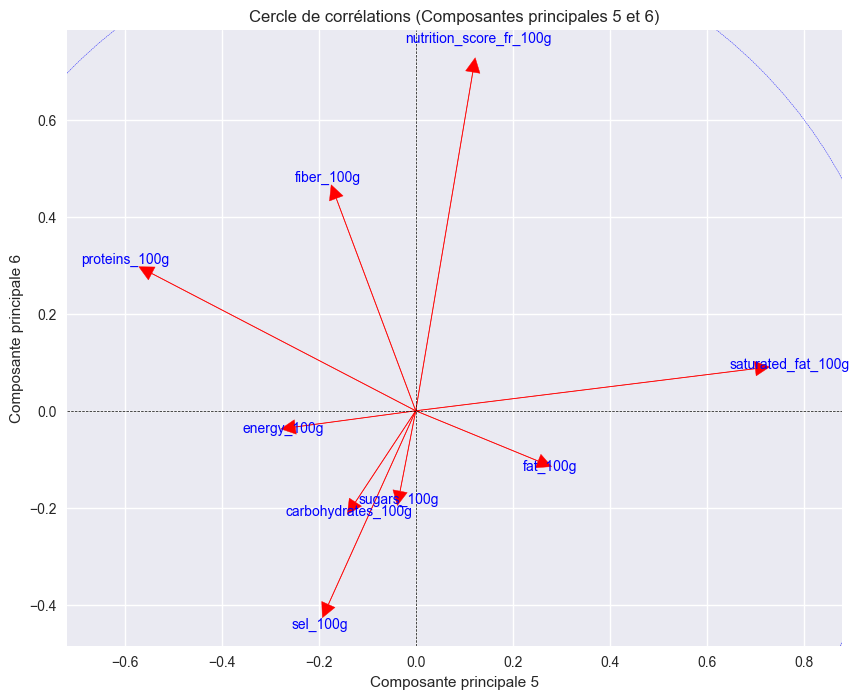

In [60]:
# Cercle de corrélations pour les composantes 5 et 6
plt.figure(figsize=(10, 8))
components_56 = pca.components_[4:6]  # Composantes 5 et 6
for i, (x, y) in enumerate(zip(components_56[0], components_56[1])):
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, color='r')
    plt.text(x * 1.1, y * 1.1, variable_names[i], color='b', ha='center', va='center')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(plt.circle)
plt.title("Cercle de corrélations (Composantes principales 5 et 6)")
plt.xlabel("Composante principale 5")
plt.ylabel("Composante principale 6")
plt.grid(True)
plt.axis('equal')
plt.show()

## ANOVA - Nutrition grade

##### Nous vérifierons ici s'il y a une variance égale entre les groupes de caractéristiques catégorielles 'nutrition_grade_fr' et la réponse continue 'proteins_100g'. S'il y a une variance égale entre les groupes, cela signifie que cette caractéristique n'a pas d'impact sur la réponse et qu'elle ne peut pas être prise en compte pour la formation du modèle.

##### H0 - hypothèse nulle : les moyennes des protéines par nutrition_grade_fr sont égales μA=μB=μC=μD=μE.
##### H1 - hypothèse alternative : au moins un des groupes de protéines par nutrition_grade_fr à une moyenne différente des autres groupes μA!=μB!=μC!=μD!=μE.

### Condition a verifier :
##### 1 - Les échantillons sont indépendants les uns des autres.
##### 2 - Les données sont normalement distribuées.
##### 3 - Les écarts-types de population des groupes sont homoscédastiques.

In [61]:
def test_normalite(data):
    """
    Test de la normalité d'une distribution
    Parameters
    ----------
    data : dataframe ou dataframe restreint (une seule variable) obligatoire
    Returns
    -------
    None.
    """
    #  H0 : la distribution des données est normale (P>0,05)
    #  H1 : la distribution des données n'est pas normale (P<0,05)

    df_resultat = pd.DataFrame([])
    # Shapiro-Wilk - D'Agostino's K^2
    for f_name, func in zip(['Shapiro-Wilks', "D'Agostino K^2"], [shapiro, normaltest]):
        stat, p_val = func(data)
        df_resultat.loc[f_name, 'stat'] = stat
        df_resultat.loc[f_name, 'p_value'] = p_val
        df_resultat.loc[f_name, 'res'] = [p_val > 0.05]
        bool = df_resultat.loc[f_name, 'res']

        if bool == True:
            df_resultat.loc[f_name, 'bilan'] = 'H0 aceptée - distribution normale'
        else:
            df_resultat.loc[f_name, 'bilan'] = 'H0 rejetée - distribution non normale'

    # Anderson-Darling
    result = anderson(data, dist='norm')
    df_resultat.loc['Anderson-Darling', 'stat'] = result.statistic
    res_and = [(int(result.significance_level[i]), result.statistic < res)
               for i, res in enumerate(result.critical_values)]
    df_resultat.loc['Anderson-Darling', 'res'] = str(res_and)
    display(df_resultat)

In [62]:
# Test de normalite
test_normalite(data['proteins_100g'])

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat  p_value  \
Shapiro-Wilks        0.597305      0.0   
D'Agostino K^2    5795.979797      0.0   
Anderson-Darling   885.539707      NaN   

                                                                res  \
Shapiro-Wilks                                                 False   
D'Agostino K^2                                              [False]   
Anderson-Darling  [(15, False), (10, False), (5, False), (2, Fal...   

                                                  bilan  
Shapiro-Wilks     H0 rejetée - distribution non normale  
D'Agostino K^2    H0 rejetée - distribution non normale  
Anderson-Darling                                    NaN

##### Conclusion : On rejette l'hypothèse H0 : la courbe de distribution des protéines n'est pas normale surtout pour les données de tête et de queue.

In [63]:
for col in numeric_columns:
    test_normalite(data[col])

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat       p_value  \
Shapiro-Wilks        0.958328  3.152922e-43   
D'Agostino K^2    1648.703376  0.000000e+00   
Anderson-Darling    75.244507           NaN   

                                                                res  \
Shapiro-Wilks                                                 False   
D'Agostino K^2                                              [False]   
Anderson-Darling  [(15, False), (10, False), (5, False), (2, Fal...   

                                                  bilan  
Shapiro-Wilks     H0 rejetée - distribution non normale  
D'Agostino K^2    H0 rejetée - distribution non normale  
Anderson-Darling                                    NaN

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat  p_value  \
Shapiro-Wilks        0.831848      0.0   
D'Agostino K^2    1677.520987      0.0   
Anderson-Darling   434.104684      NaN   

                                                                res  \
Shapiro-Wilks                                                 False   
D'Agostino K^2                                              [False]   
Anderson-Darling  [(15, False), (10, False), (5, False), (2, Fal...   

                                                  bilan  
Shapiro-Wilks     H0 rejetée - distribution non normale  
D'Agostino K^2    H0 rejetée - distribution non normale  
Anderson-Darling                                    NaN

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat  p_value  \
Shapiro-Wilks         0.403695      0.0   
D'Agostino K^2    14566.615685      0.0   
Anderson-Darling    998.965031      NaN   

                                                                res  \
Shapiro-Wilks                                                 False   
D'Agostino K^2                                              [False]   
Anderson-Darling  [(15, False), (10, False), (5, False), (2, Fal...   

                                                  bilan  
Shapiro-Wilks     H0 rejetée - distribution non normale  
D'Agostino K^2    H0 rejetée - distribution non normale  
Anderson-Darling                                    NaN

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat       p_value  \
Shapiro-Wilks       0.968798  9.747312e-39   
D'Agostino K^2    252.064579  1.840230e-55   
Anderson-Darling   64.725148           NaN   

                                                                res  \
Shapiro-Wilks                                                 False   
D'Agostino K^2                                              [False]   
Anderson-Darling  [(15, False), (10, False), (5, False), (2, Fal...   

                                                  bilan  
Shapiro-Wilks     H0 rejetée - distribution non normale  
D'Agostino K^2    H0 rejetée - distribution non normale  
Anderson-Darling                                    NaN

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat  p_value  \
Shapiro-Wilks        0.787896      0.0   
D'Agostino K^2    7213.072179      0.0   
Anderson-Darling   170.004356      NaN   

                                                                res  \
Shapiro-Wilks                                                 False   
D'Agostino K^2                                              [False]   
Anderson-Darling  [(15, False), (10, False), (5, False), (2, Fal...   

                                                  bilan  
Shapiro-Wilks     H0 rejetée - distribution non normale  
D'Agostino K^2    H0 rejetée - distribution non normale  
Anderson-Darling                                    NaN

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat  p_value  \
Shapiro-Wilks         0.593547      0.0   
D'Agostino K^2    12494.025959      0.0   
Anderson-Darling    732.167134      NaN   

                                                                res  \
Shapiro-Wilks                                                 False   
D'Agostino K^2                                              [False]   
Anderson-Darling  [(15, False), (10, False), (5, False), (2, Fal...   

                                                  bilan  
Shapiro-Wilks     H0 rejetée - distribution non normale  
D'Agostino K^2    H0 rejetée - distribution non normale  
Anderson-Darling                                    NaN

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat  p_value  \
Shapiro-Wilks        0.597305      0.0   
D'Agostino K^2    5795.979797      0.0   
Anderson-Darling   885.539707      NaN   

                                                                res  \
Shapiro-Wilks                                                 False   
D'Agostino K^2                                              [False]   
Anderson-Darling  [(15, False), (10, False), (5, False), (2, Fal...   

                                                  bilan  
Shapiro-Wilks     H0 rejetée - distribution non normale  
D'Agostino K^2    H0 rejetée - distribution non normale  
Anderson-Darling                                    NaN

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat  p_value  \
Shapiro-Wilks         0.124507      0.0   
D'Agostino K^2    13542.824675      0.0   
Anderson-Darling   2520.190617      NaN   

                                                                res  \
Shapiro-Wilks                                                 False   
D'Agostino K^2                                              [False]   
Anderson-Darling  [(15, False), (10, False), (5, False), (2, Fal...   

                                                  bilan  
Shapiro-Wilks     H0 rejetée - distribution non normale  
D'Agostino K^2    H0 rejetée - distribution non normale  
Anderson-Darling                                    NaN

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat  p_value  \
Shapiro-Wilks        0.799471      0.0   
D'Agostino K^2    1547.151660      0.0   
Anderson-Darling   631.225766      NaN   

                                                                res  \
Shapiro-Wilks                                                 False   
D'Agostino K^2                                              [False]   
Anderson-Darling  [(15, False), (10, False), (5, False), (2, Fal...   

                                                  bilan  
Shapiro-Wilks     H0 rejetée - distribution non normale  
D'Agostino K^2    H0 rejetée - distribution non normale  
Anderson-Darling                                    NaN

##### Conclusion : aucune distribution des groupes de protéines par nutrition_grade_fr est normale.

### Verification homoscedasticite

In [64]:
# Préparation des variables
gb = data.groupby('nutrition_grade_fr')['proteins_100g']
nutrigr_df = pd.DataFrame([gb.get_group(n).values for n in list('ABCDE')],
                          index=list('ABCDE')).T
nutrigr_df_sans_nan = nutrigr_df.dropna()
nutrigr_df_a = nutrigr_df_sans_nan['A']
nutrigr_df_b = nutrigr_df_sans_nan['B']
nutrigr_df_c = nutrigr_df_sans_nan['C']
nutrigr_df_d = nutrigr_df_sans_nan['D']
nutrigr_df_e = nutrigr_df_sans_nan['E']

In [65]:
#  Test de Bartlett's
# H0 : les groupes sont homoscédastiques,variances identiques
# p_value>0.05 rejet de H1 en faveur de H0
# p_value<=0.05 H0 rejetée en faveur de H1
# H1 : les groupes sont hétéroscédastiques variances différentes

F_val, p_value = stats.bartlett(nutrigr_df_a, nutrigr_df_b, nutrigr_df_b, nutrigr_df_d, nutrigr_df_e)
print(f'Test Bartlett - resultats: F={F_val}, P_value ={p_value}\n')
print('Groupes probablement homoscédastiques') if p_value > 0.05 else print('Groupes probablement hétéroscédastiques')

Test Bartlett - resultats: F=inf, P_value =0.0

Groupes probablement hétéroscédastiques


c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:2901: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


##### Conclusion : p_value<0.05 on rejette H0 au profit de H1, les groupes sont hétéroscédastiques. Tout au moins on ne peut pas dire que les variances sont significativement identiques.

In [66]:
# Identification des groupes basés sur `nutrition_grade_fr`
categorical_column = "nutrition_grade_fr"

# Liste des variables numériques à tester
anova_results = {}
for col in numeric_columns:
    # Création de groupes selon les catégories
    groups = [data[data[categorical_column] == category][col].dropna()
              for category in data[categorical_column].unique() if category is not None]
    
    # Test ANOVA
    if len(groups) > 1:  # S'assurer qu'il y a plusieurs groupes
        anova = f_oneway(*groups)
        anova_results[col] = anova.pvalue

# Résultats triés par significativité (p-value)
anova_results_sorted = {k: v for k, v in sorted(anova_results.items(), key=lambda item: item[1])}
anova_results_sorted

{'nutrition_score_fr_100g': 0.0,
 'fat_100g': 6.121446323806518e-282,
 'sugars_100g': 3.2335344168019833e-174,
 'carbohydrates_100g': 1.8314319727473901e-143,
 'energy_100g': 6.353575609219489e-118,
 'proteins_100g': 1.83018810177042e-99,
 'fiber_100g': 1.6158850464430363e-96,
 'sel_100g': 1.5380995892595706e-58,
 'saturated_fat_100g': 6.996203758531342e-40}

### Distributions des variables numériques significatives

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


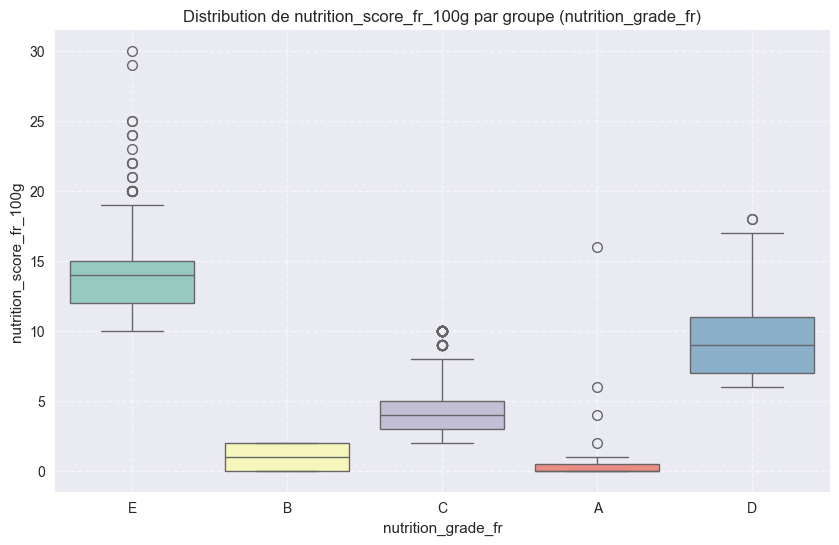

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


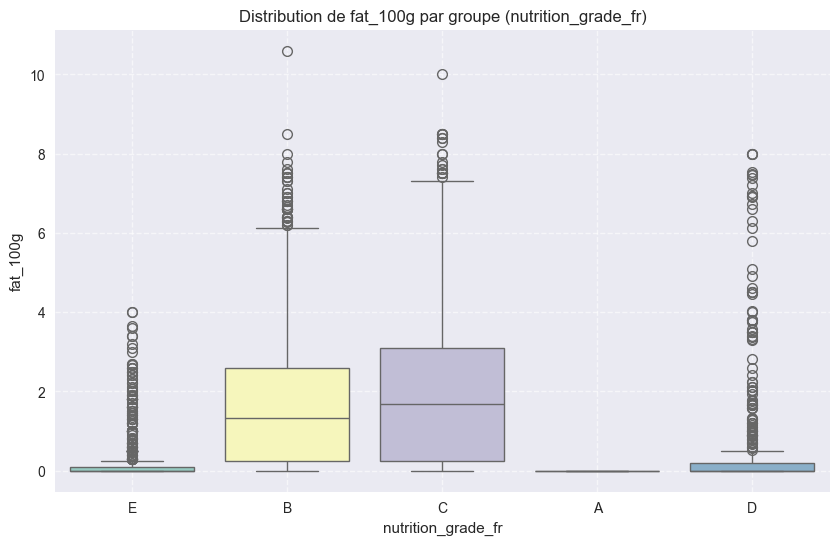

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


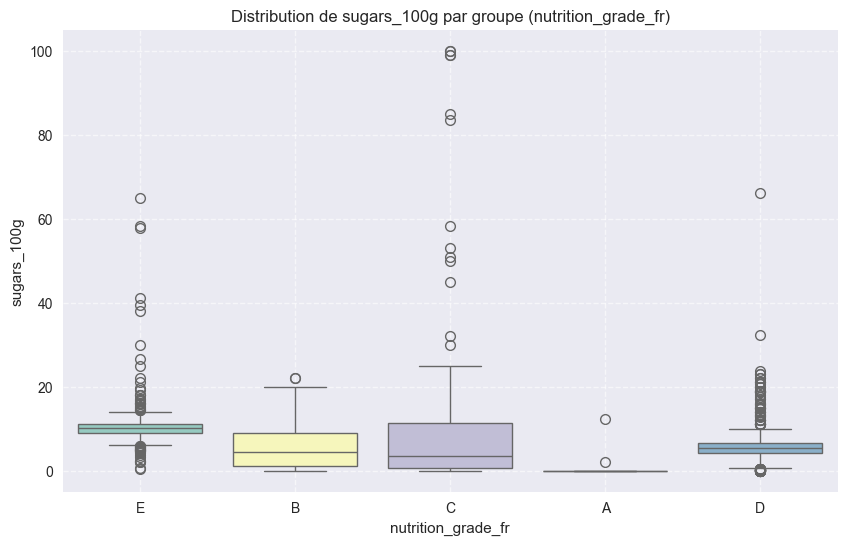

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


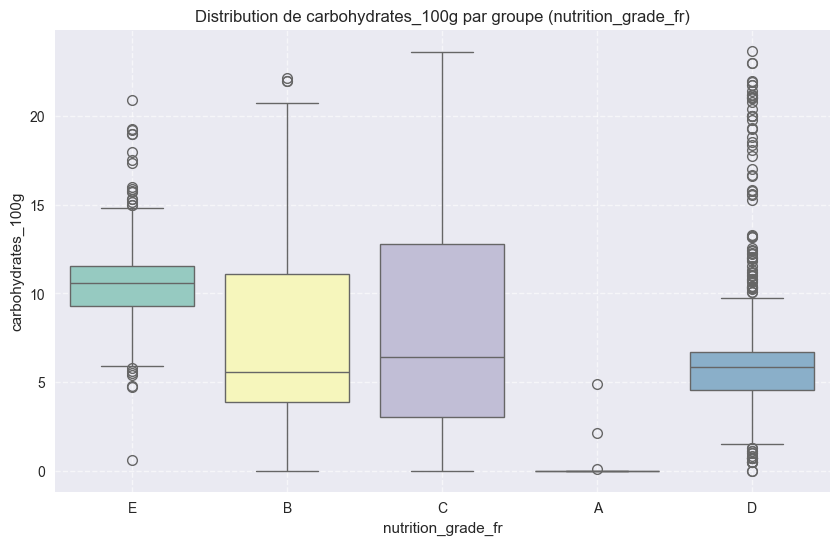

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


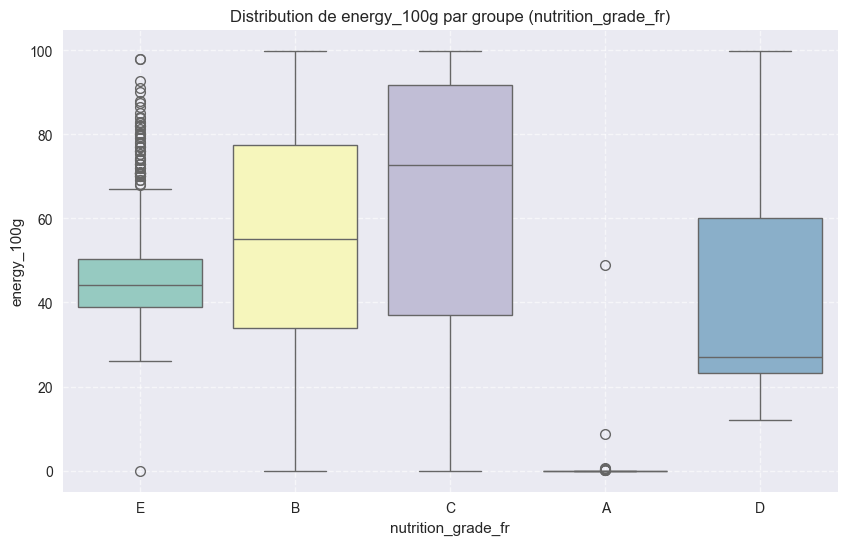

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


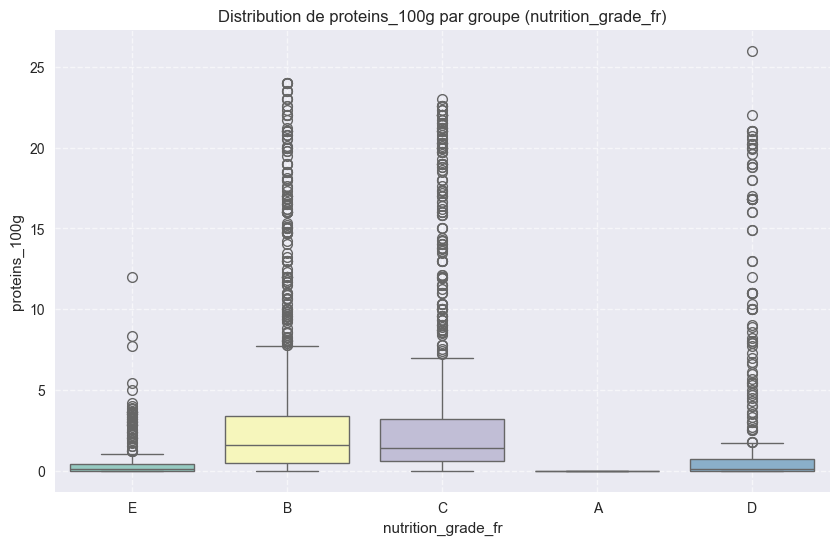

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


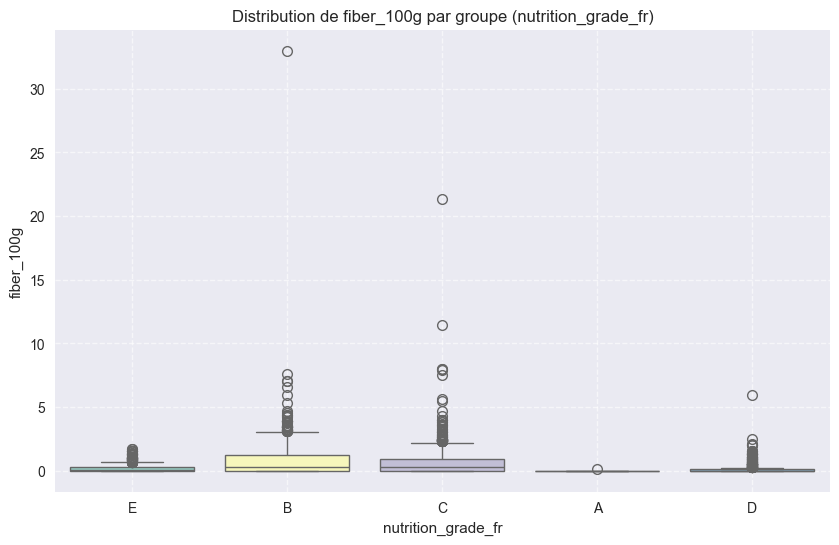

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


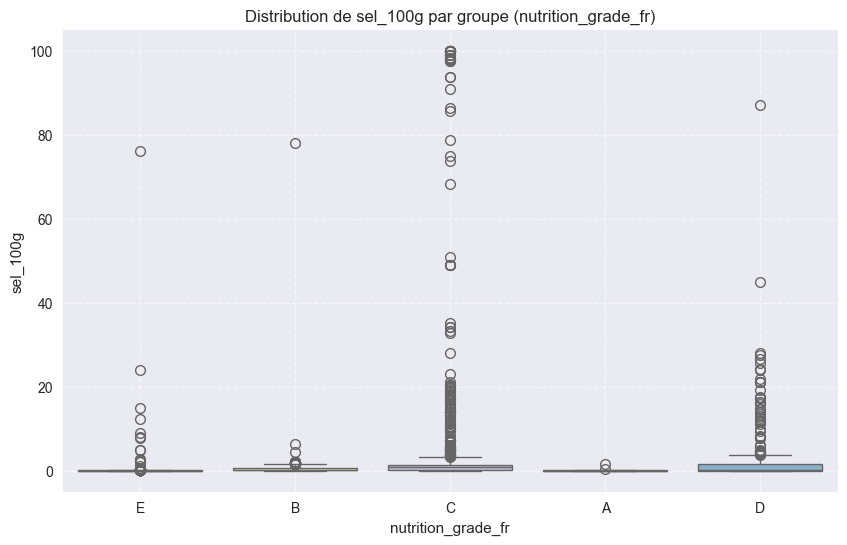

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


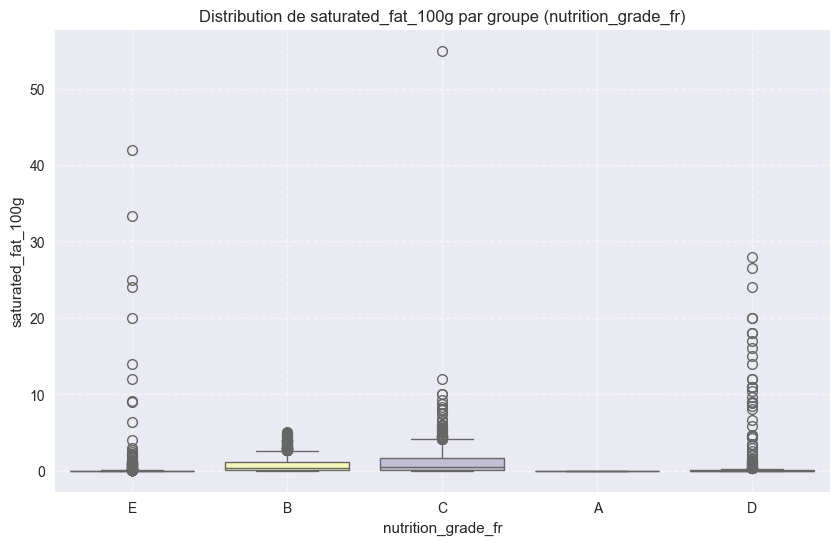

In [67]:
# Visualisation des distributions avec des box plots
for col in anova_results_sorted.keys():
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")
    plt.title(f"Distribution de {col} par groupe ({categorical_column})")
    plt.xlabel(categorical_column)
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

## ANOVA - Pnns groupe 1 / Realisation du test a but educatif

In [68]:
# Identification des groupes basés sur `pnns_groups_1`
categorical_column = "pnns_groups_1"

# Test ANOVA pour les groupes définis par `pnns_groups_1`
anova_results_pnns = {}
for col in numeric_columns:
    # Création de groupes selon les catégories
    groups = [data[data[categorical_column] == category][col].dropna()
              for category in data[categorical_column].unique() if category is not None]
    
    # Test ANOVA
    if len(groups) > 1:  # S'assurer qu'il y a plusieurs groupes
        anova = f_oneway(*groups)
        anova_results_pnns[col] = anova.pvalue

# Résultats triés par significativité (p-value)
anova_results_pnns_sorted = {k: v for k, v in sorted(anova_results_pnns.items(), key=lambda item: item[1])}
anova_results_pnns_sorted

{'energy_100g': 0.0,
 'fat_100g': 0.0,
 'fiber_100g': 0.0,
 'proteins_100g': 0.0,
 'nutrition_score_fr_100g': 0.0,
 'sugars_100g': 2.888073121501202e-268,
 'carbohydrates_100g': 5.09566890897975e-211,
 'saturated_fat_100g': 1.3730124963240783e-158,
 'sel_100g': 2.212065734055854e-31}

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


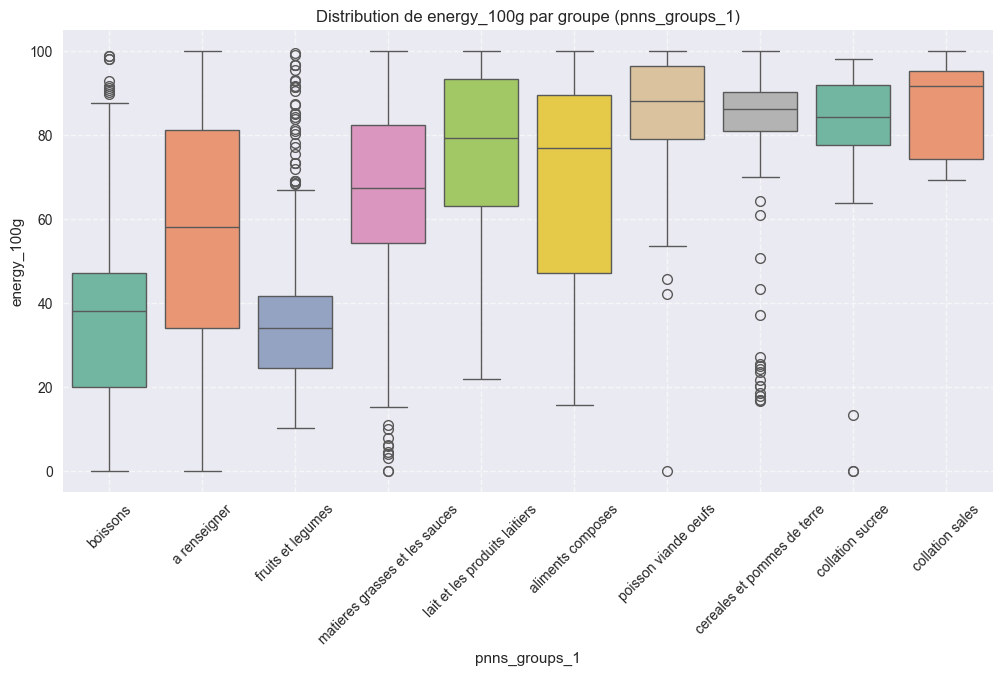

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


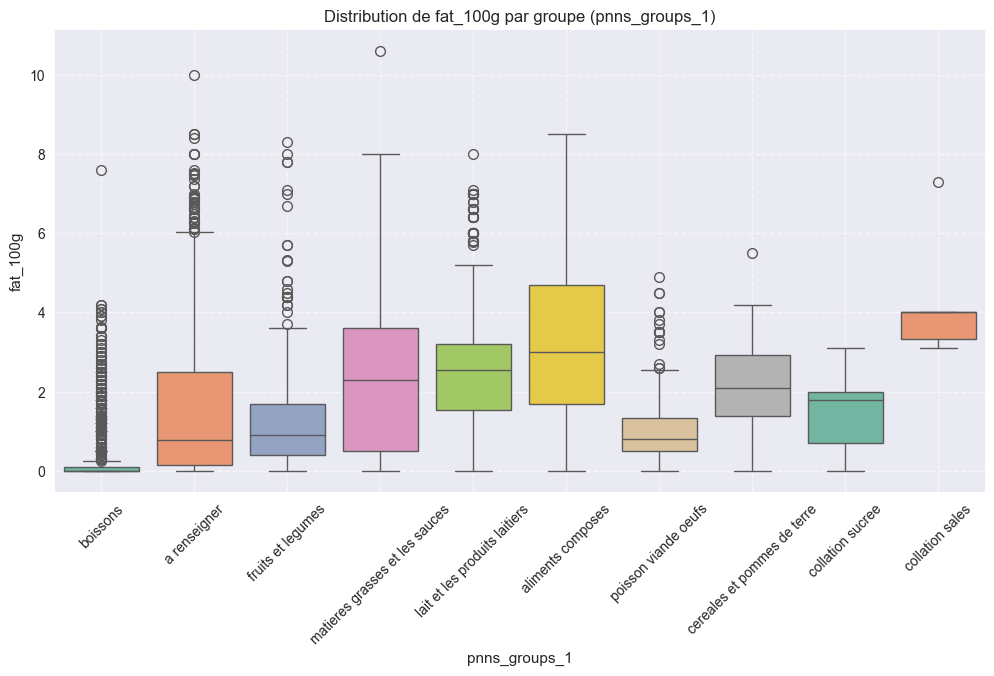

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


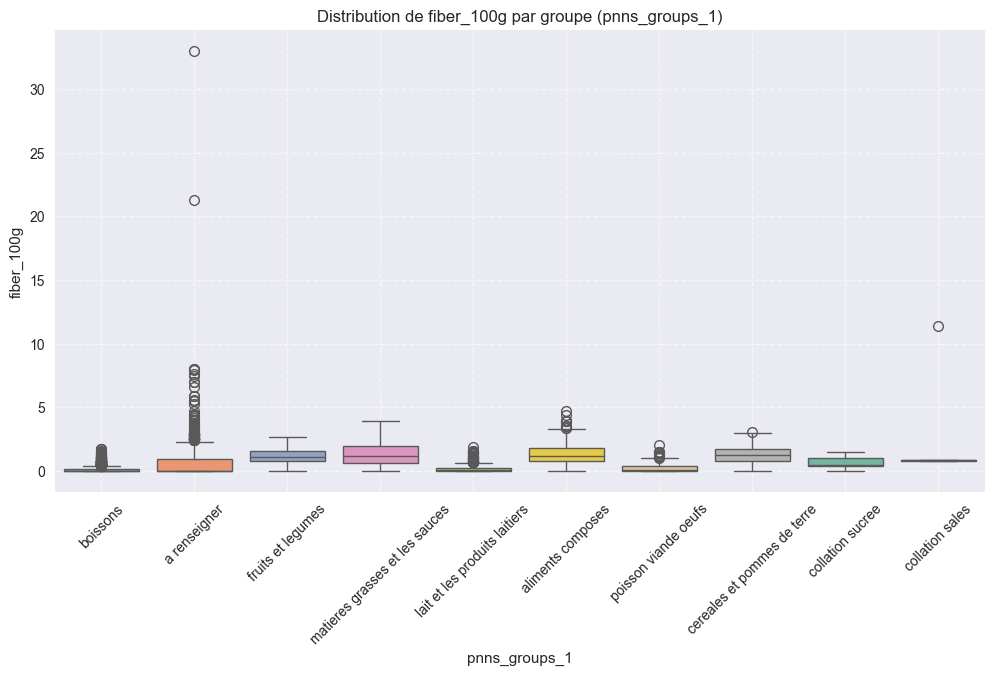

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


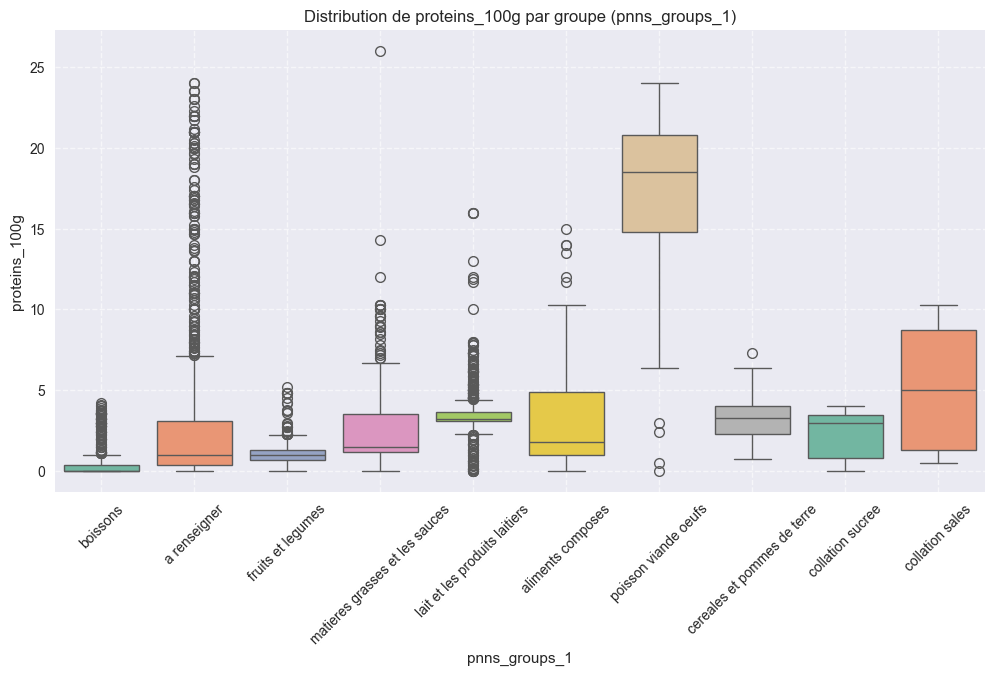

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


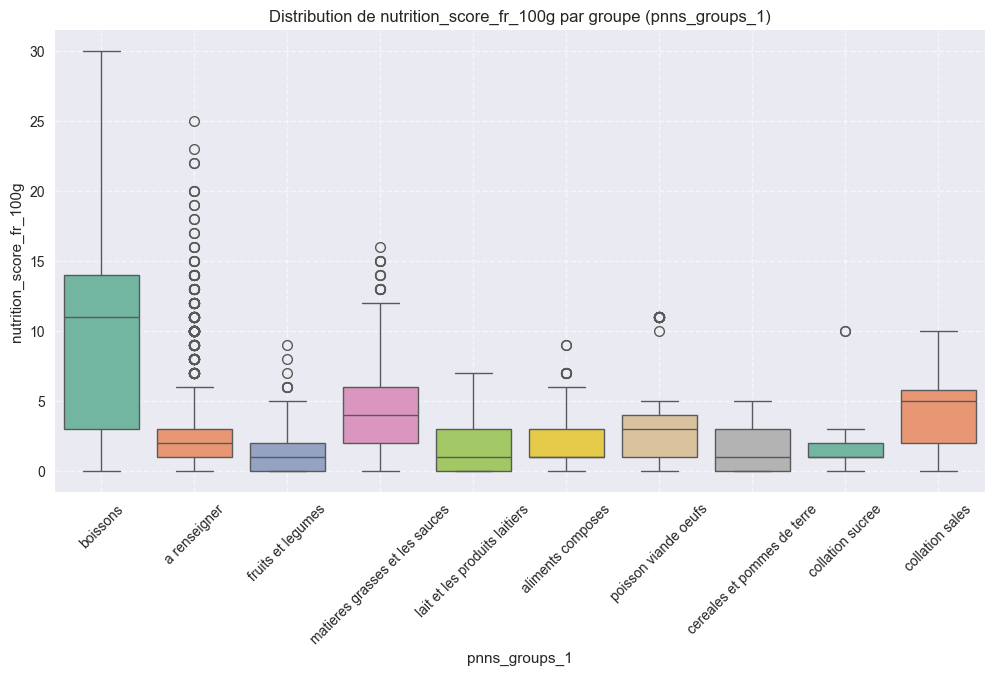

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


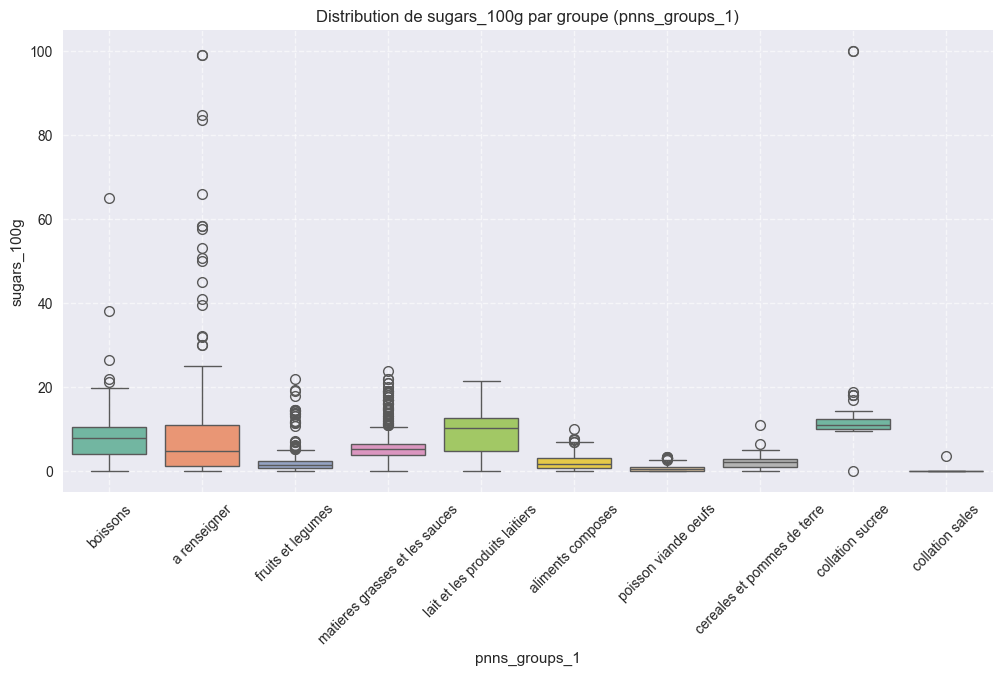

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


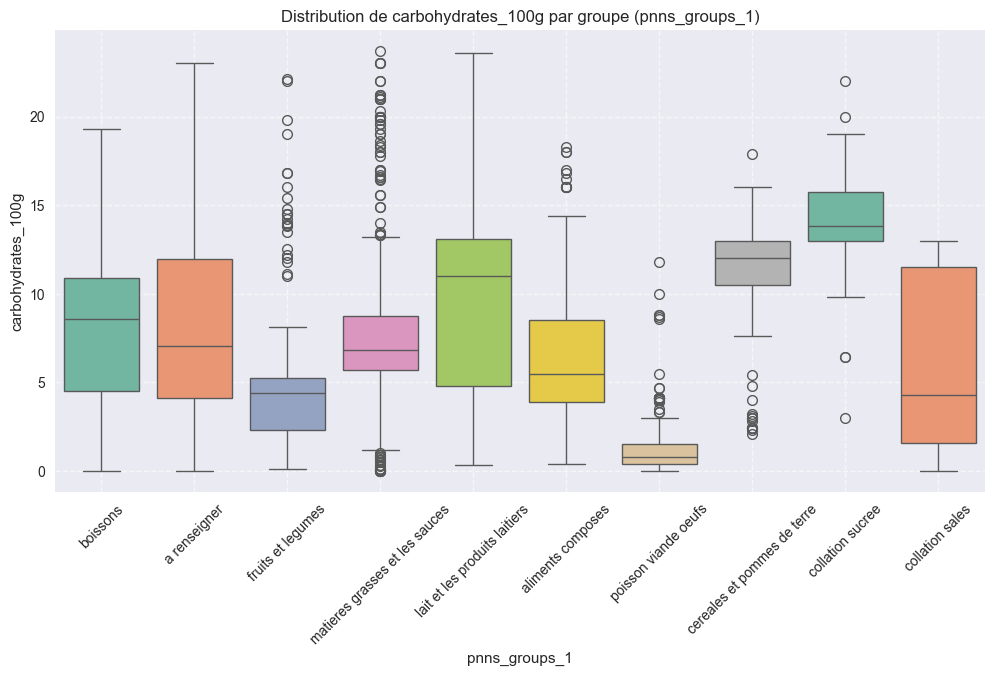

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


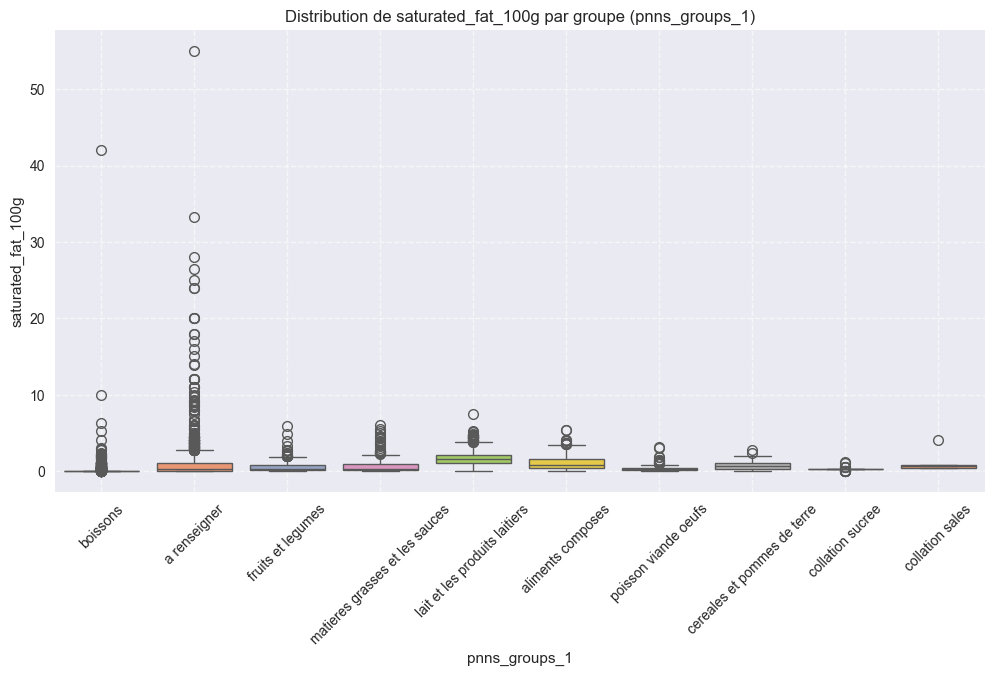

C:\Users\cosic\AppData\Local\Temp\ipykernel_26048\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


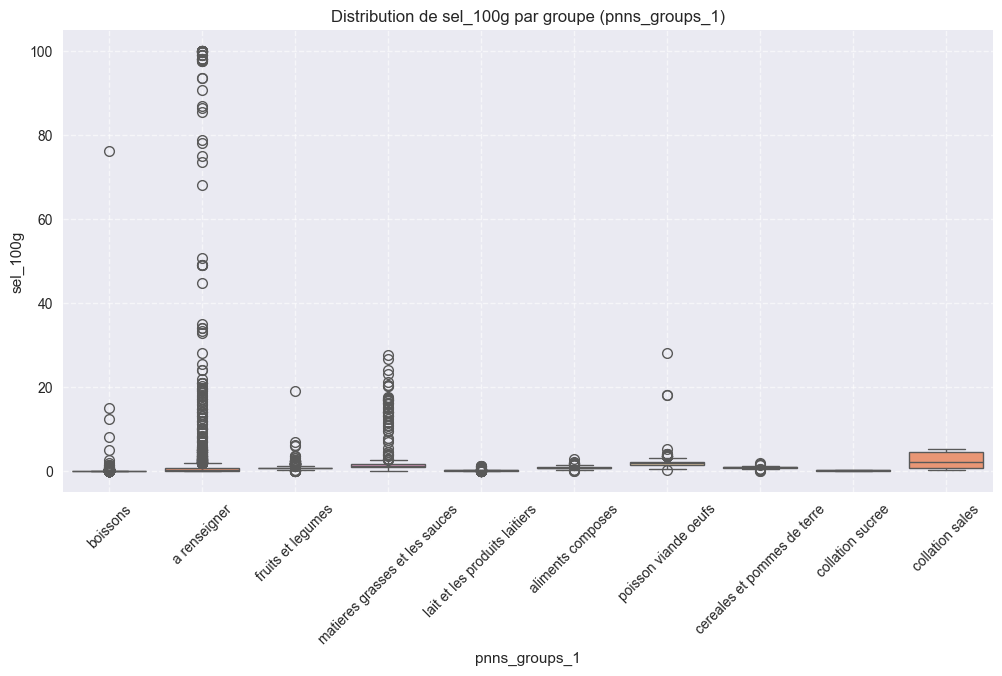

In [69]:
# Visualisation des distributions avec des box plots pour `pnns_groups_1`
for col in anova_results_pnns_sorted.keys():
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")
    plt.title(f"Distribution de {col} par groupe ({categorical_column})")
    plt.xlabel(categorical_column)
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()